In [111]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.preprocessing import MinMaxScaler

In [112]:
train_labels = pd.read_csv("./datasets/train_labels.csv")
train_values = pd.read_csv("./datasets/train_values.csv")
test_values = pd.read_csv("./datasets/test_values.csv")
test_labels = pd.read_csv("./datasets/SubmissionFormat.csv")
train_data = train_values.merge(train_labels, on='id')
test_values = test_values.merge(test_labels, on='id')

## status_group-functional,non-functional or needs repair
amount_tsh – Total static head (amount water available to waterpoint)

date_recorded – The date the row was entered

funder – Who funded the well

gps_height – Altitude of the well

installer – Organization that installed the well

longitude – GPS coordinate

latitude – GPS coordinate

wpt_name – Name of the waterpoint if there is one

num_private -No description

basin – Geographic water basin

subvillage – Geographic location

region – Geographic location

region_code – Geographic location (coded)

district_code – Geographic location (coded)

lga – Geographic location

ward – Geographic location

population – Population around the well

public_meeting – True/False

recorded_by – Group entering this row of data

scheme_management – Who operates the water point

scheme_name – Who operates the water point

permit – If the water point is permitted

construction_year – Year the water point was constructed

extraction_type – The kind of extraction the water point uses

extraction_type_group – The kind of extraction the water point uses

extraction_type_class – The kind of extraction the water point uses

management – How the water point is managed

management_group – How the water point is managed

payment – What the water costs

payment_type – What the water costs

water_quality – The quality of the water

quality_group – The quality of the water

quantity – The quantity of water

quantity_group – The quantity of water

source – The source of the water

source_type – The source of the water

source_class – The source of the water

waterpoint_type – The kind of waterpoint

waterpoint_type_group – The kind of waterpoint

In [113]:
train_data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [114]:
train_data.amount_tsh.replace(0.0, np.nan, inplace=True)
train_data.gps_height.replace(0.0, np.nan, inplace=True)
train_data.population.replace(0.0, np.nan, inplace=True)

In [115]:
train_data.isnull().sum()

id                           0
amount_tsh               41639
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [116]:
train_data.groupby(['region', 'permit']).size()

region         permit
Arusha         False      255
               True      2650
Dar es Salaam  False      777
Dodoma         False     1212
               True       989
Iringa         False     2117
               True      3174
Kagera         False      795
               True      2521
Kigoma         False     1160
               True      1656
Kilimanjaro    False      445
               True      3796
Lindi          False      733
               True       813
Manyara        False       77
               True      1506
Mara           False      604
               True       998
Mbeya          False     1399
               True      2134
Morogoro       False       39
               True      3967
Mtwara         False      419
               True      1311
Mwanza         False      127
               True      2975
Pwani          False     1105
               True      1530
Rukwa          False      646
               True      1162
Ruvuma         False      840
               Tru

In [117]:
train_data.gps_height.fillna(train_data.groupby(['region', 'district_code'])['gps_height'].transform('mean'), inplace=True)

In [118]:
train_data.gps_height.fillna(train_data.groupby(['region'])['gps_height'].transform('mean'), inplace=True)

In [119]:
train_data.gps_height.fillna(train_data.gps_height.mean(), inplace=True)

In [120]:
train_data.population.fillna(train_data.groupby(['region', 'district_code'])['population'].transform('median'), inplace=True)

In [121]:
train_data.population.fillna(train_data.groupby(['region'])['population'].transform('median'), inplace=True)

In [122]:
train_data.population.fillna(train_data.population.median(), inplace=True)

In [123]:
train_data.amount_tsh.fillna(train_data.groupby(['region', 'district_code'])['amount_tsh'].transform('median'), inplace=True)

In [124]:
train_data.amount_tsh.fillna(train_data.groupby(['region'])['amount_tsh'].transform('median'), inplace=True)

In [125]:
train_data.amount_tsh.fillna(train_data.amount_tsh.median(), inplace=True)

In [126]:
train_data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [127]:
print("LATITUDE RANGE: ", train_data.latitude.max(), train_data.latitude.mean(), train_data.latitude.min())

LATITUDE RANGE:  -2e-08 -5.706032659626431 -11.64944018


In [128]:
print("LONGITUDE RANGE: ", train_data.longitude.max(), train_data.longitude.mean(), train_data.longitude.min())

LONGITUDE RANGE:  40.34519307 34.077426692028794 0.0


In [129]:
column_names = ['amount_tsh', 'gps_height', 'population']
mm_scaler = MinMaxScaler(feature_range=(0, 20))
train_data[column_names] = mm_scaler.fit_transform(train_data[column_names])
train_data[column_names].head(25)

,amount_tsh,gps_height,population
0,0.342846,10.349650,0.071475
1,0.011417,10.412587,0.183607
2,0.001417,5.426573,0.163934
3,0.002846,2.468531,0.038033
4,0.014274,0.629371,0.000000
5,0.001131,0.629371,0.000656
6,0.028560,0.629371,0.000000
7,0.028560,0.629371,0.000000
8,0.014274,0.629371,0.000000
9,0.014274,0.629371,0.000000


In [130]:
train_data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

# Status Group (Output) Frequency value count.

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

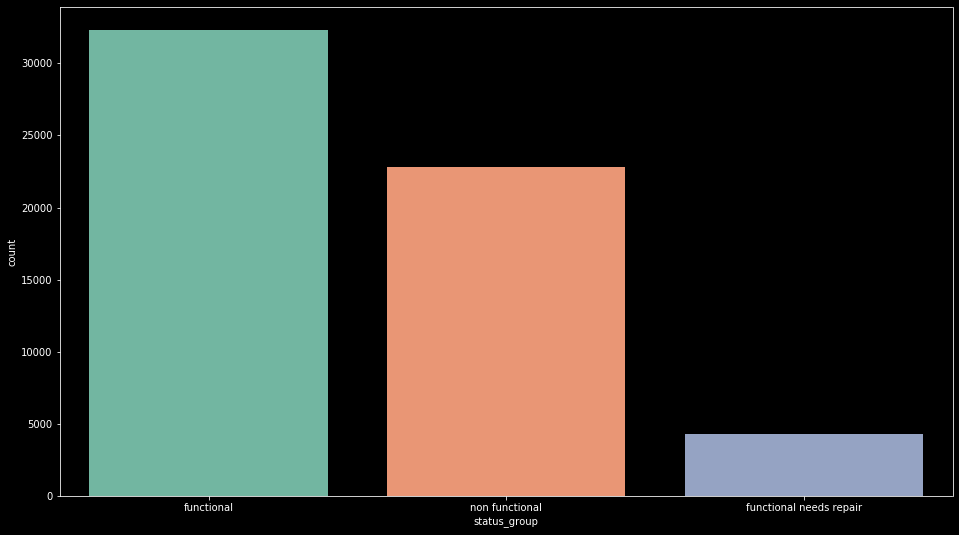

In [131]:
plt.figure(figsize=(16,9))
sbn.countplot(train_data.status_group, palette='Set2')
train_data.status_group.value_counts()

# Water Quality Vs Status Group

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

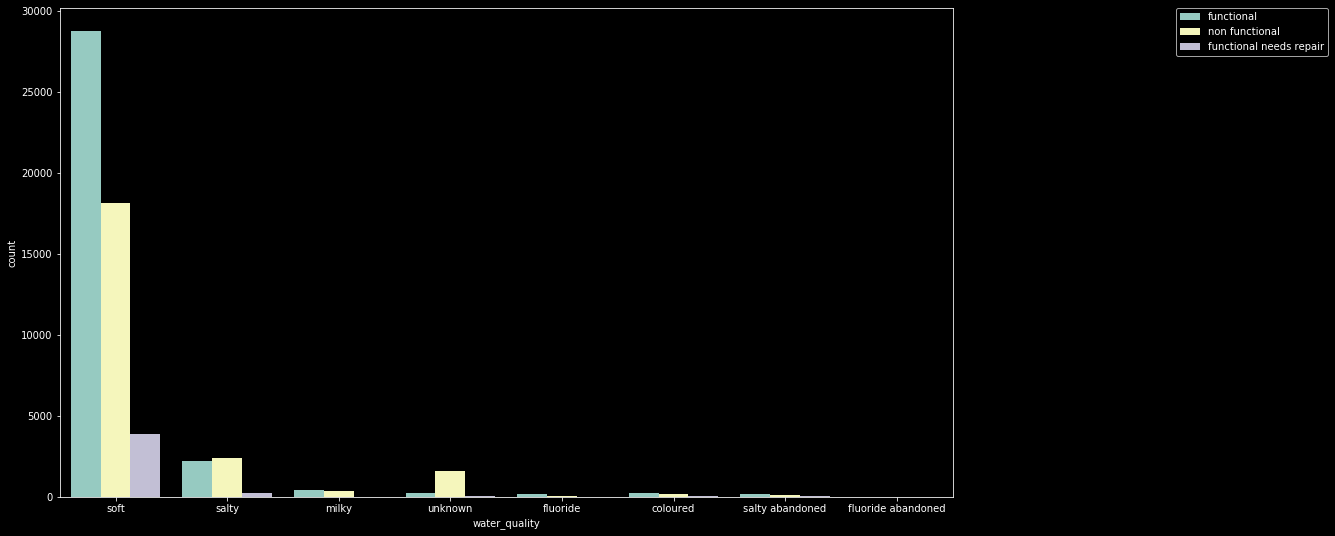

In [132]:
plt.figure(figsize=(16, 9))
sbn.countplot(data=train_data, x='water_quality', hue='status_group')
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.0)
train_data.water_quality.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

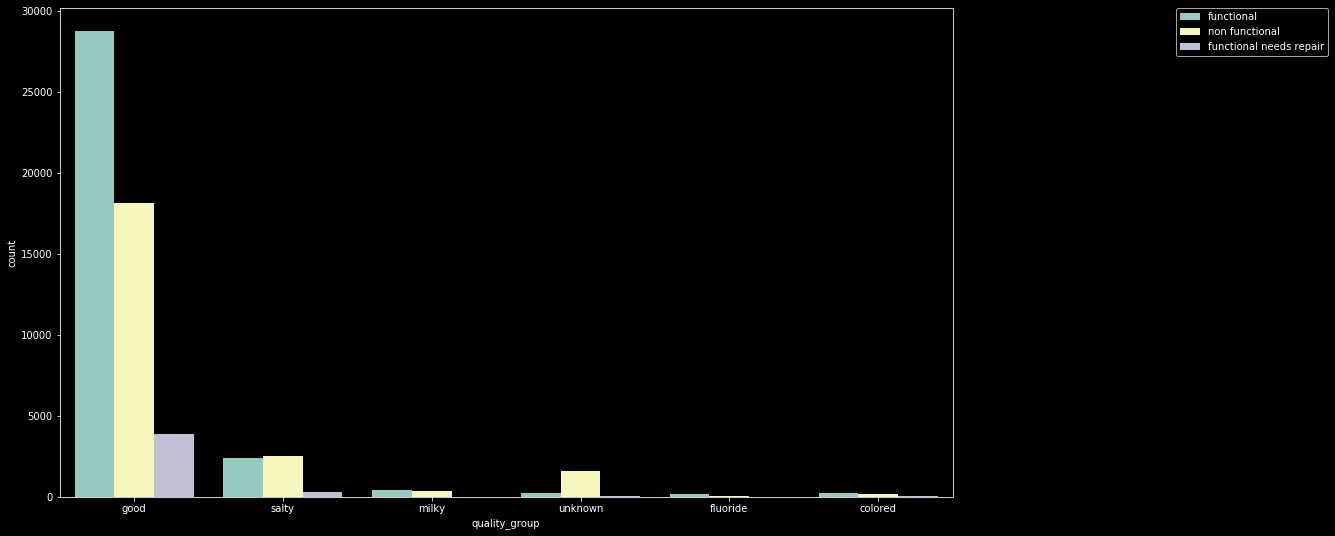

In [133]:
plt.figure(figsize=(16, 9))
sbn.countplot(data=train_data, x='quality_group', hue='status_group')
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.0)
train_data.quality_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

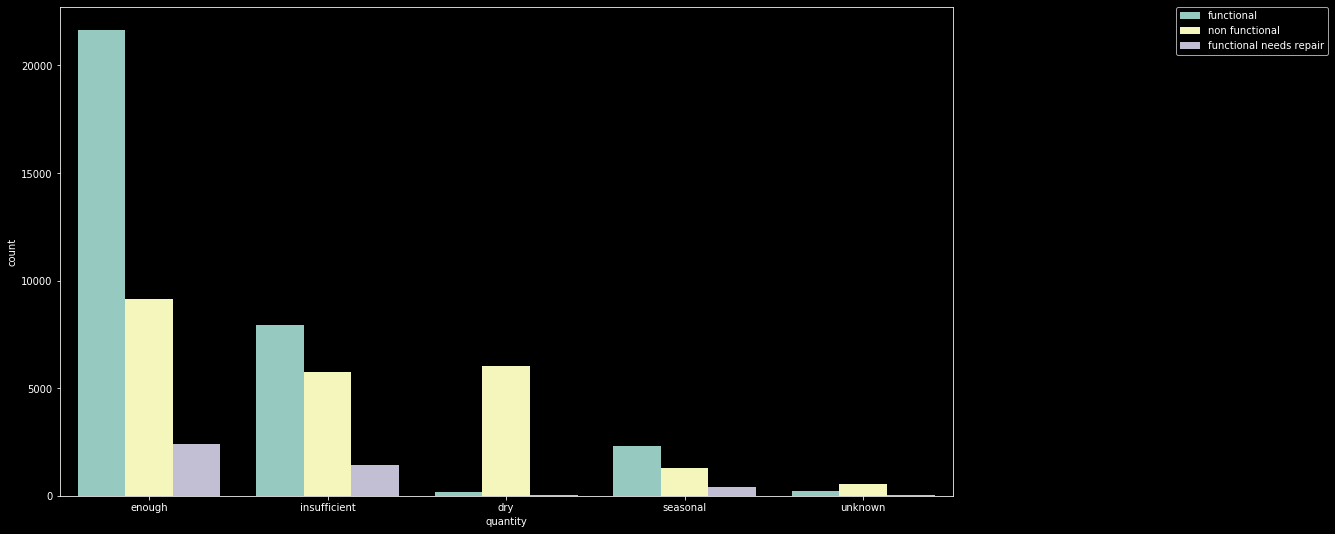

In [134]:
plt.figure(figsize=(16, 9))
sbn.countplot(data=train_data, x='quantity', hue='status_group')
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.0)
train_data.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

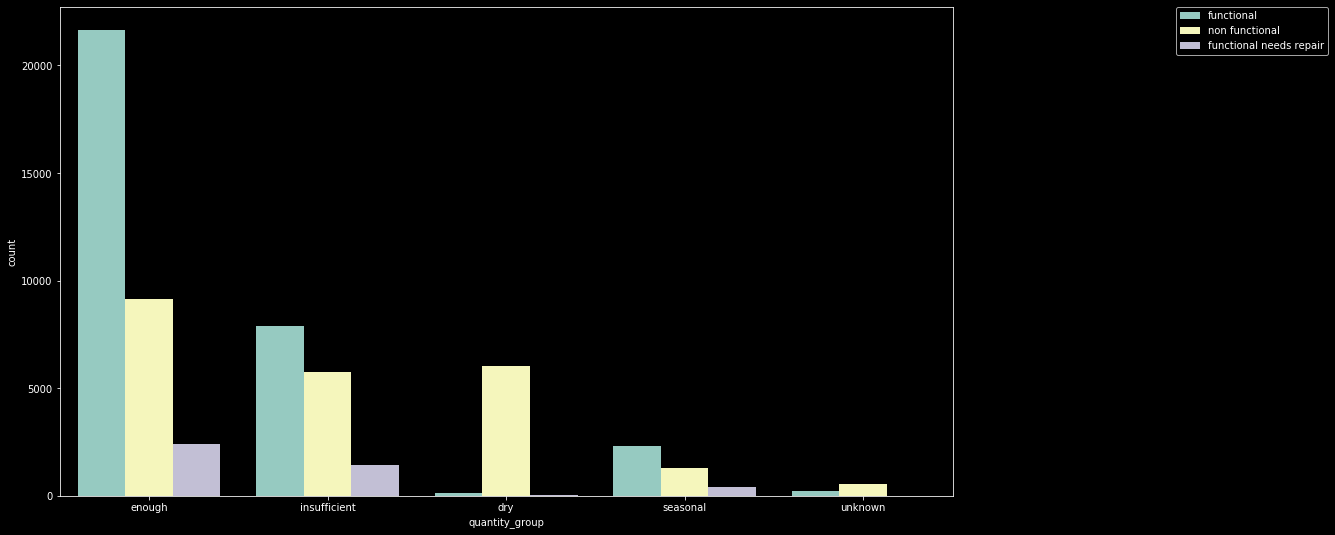

In [135]:
plt.figure(figsize=(16, 9))
sbn.countplot(data=train_data, x='quantity_group', hue='status_group')
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.0)
train_data.quantity_group.value_counts()

# Region vs Status Group

[Text(0, 0, 'Iringa'),
 Text(0, 0, 'Mara'),
 Text(0, 0, 'Manyara'),
 Text(0, 0, 'Mtwara'),
 Text(0, 0, 'Kagera'),
 Text(0, 0, 'Tanga'),
 Text(0, 0, 'Shinyanga'),
 Text(0, 0, 'Tabora'),
 Text(0, 0, 'Pwani'),
 Text(0, 0, 'Ruvuma'),
 Text(0, 0, 'Kilimanjaro'),
 Text(0, 0, 'Rukwa'),
 Text(0, 0, 'Mwanza'),
 Text(0, 0, 'Kigoma'),
 Text(0, 0, 'Lindi'),
 Text(0, 0, 'Dodoma'),
 Text(0, 0, 'Arusha'),
 Text(0, 0, 'Mbeya'),
 Text(0, 0, 'Singida'),
 Text(0, 0, 'Morogoro'),
 Text(0, 0, 'Dar es Salaam')]

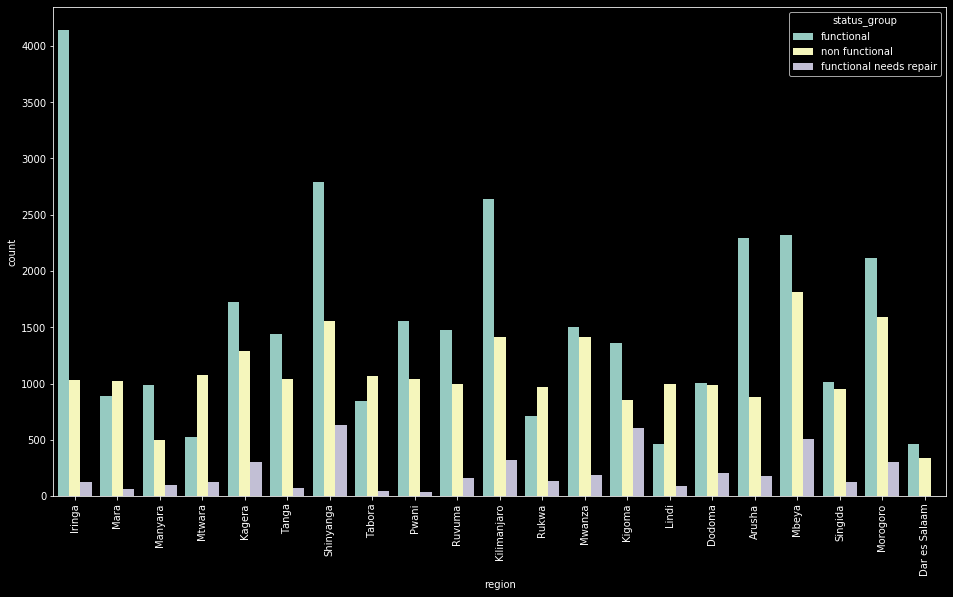

In [136]:
plt.figure(figsize=(16, 9))
plot = sbn.countplot(data=train_data, x='region', hue='status_group')
plot.set_xticklabels(rotation=90, labels=plot.get_xticklabels())

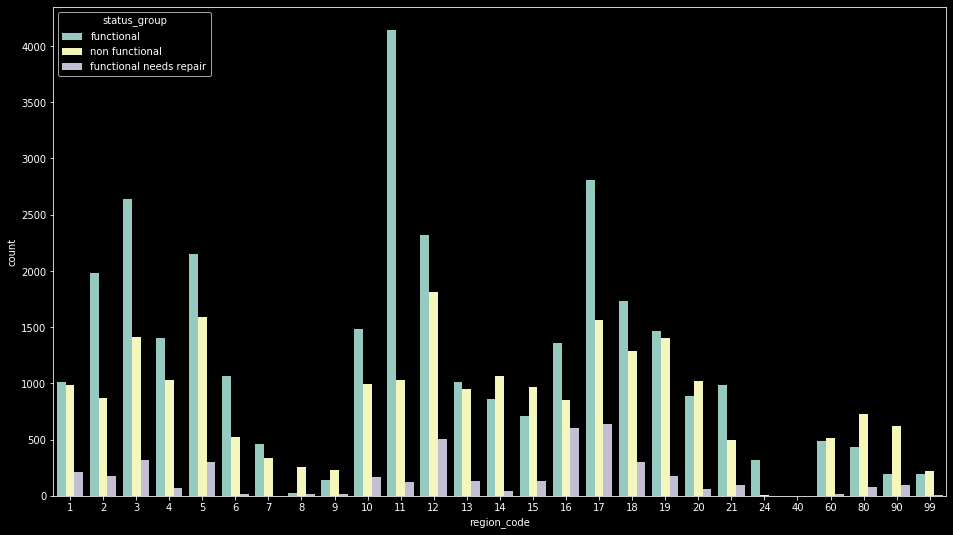

In [137]:
plt.figure(figsize=(16, 9))
sbn.countplot(data=train_data, x='region_code', hue='status_group')

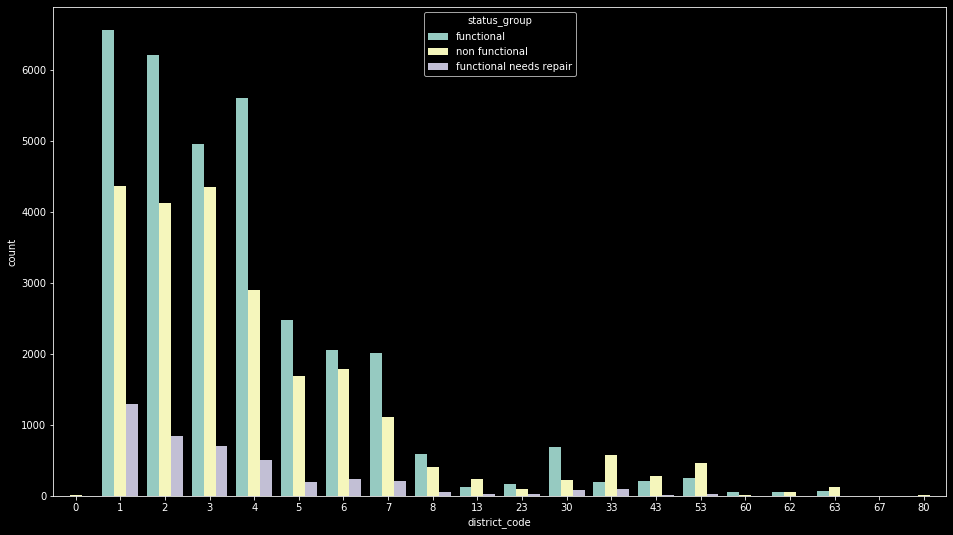

In [138]:
plt.figure(figsize=(16, 9))
sbn.countplot(data=train_data, x='district_code', hue='status_group')

[Text(0, 0, 'Ludewa'),
 Text(0, 0, 'Serengeti'),
 Text(0, 0, 'Simanjiro'),
 Text(0, 0, 'Nanyumbu'),
 Text(0, 0, 'Karagwe'),
 Text(0, 0, 'Mkinga'),
 Text(0, 0, 'Shinyanga Rural'),
 Text(0, 0, 'Kahama'),
 Text(0, 0, 'Tabora Urban'),
 Text(0, 0, 'Mkuranga'),
 Text(0, 0, 'Namtumbo'),
 Text(0, 0, 'Maswa'),
 Text(0, 0, 'Siha'),
 Text(0, 0, 'Meatu'),
 Text(0, 0, 'Sumbawanga Rural'),
 Text(0, 0, 'Njombe'),
 Text(0, 0, 'Ukerewe'),
 Text(0, 0, 'Bariadi'),
 Text(0, 0, 'Same'),
 Text(0, 0, 'Kigoma Rural'),
 Text(0, 0, 'Moshi Rural'),
 Text(0, 0, 'Lindi Rural'),
 Text(0, 0, 'Rombo'),
 Text(0, 0, 'Chamwino'),
 Text(0, 0, 'Bagamoyo'),
 Text(0, 0, 'Mafia'),
 Text(0, 0, 'Arusha Rural'),
 Text(0, 0, 'Kyela'),
 Text(0, 0, 'Kondoa'),
 Text(0, 0, 'Kilolo'),
 Text(0, 0, 'Kibondo'),
 Text(0, 0, 'Makete'),
 Text(0, 0, 'Singida Rural'),
 Text(0, 0, 'Masasi'),
 Text(0, 0, 'Rungwe'),
 Text(0, 0, 'Moshi Urban'),
 Text(0, 0, 'Geita'),
 Text(0, 0, 'Mbulu'),
 Text(0, 0, 'Bukoba Rural'),
 Text(0, 0, 'Muheza'),
 Text(

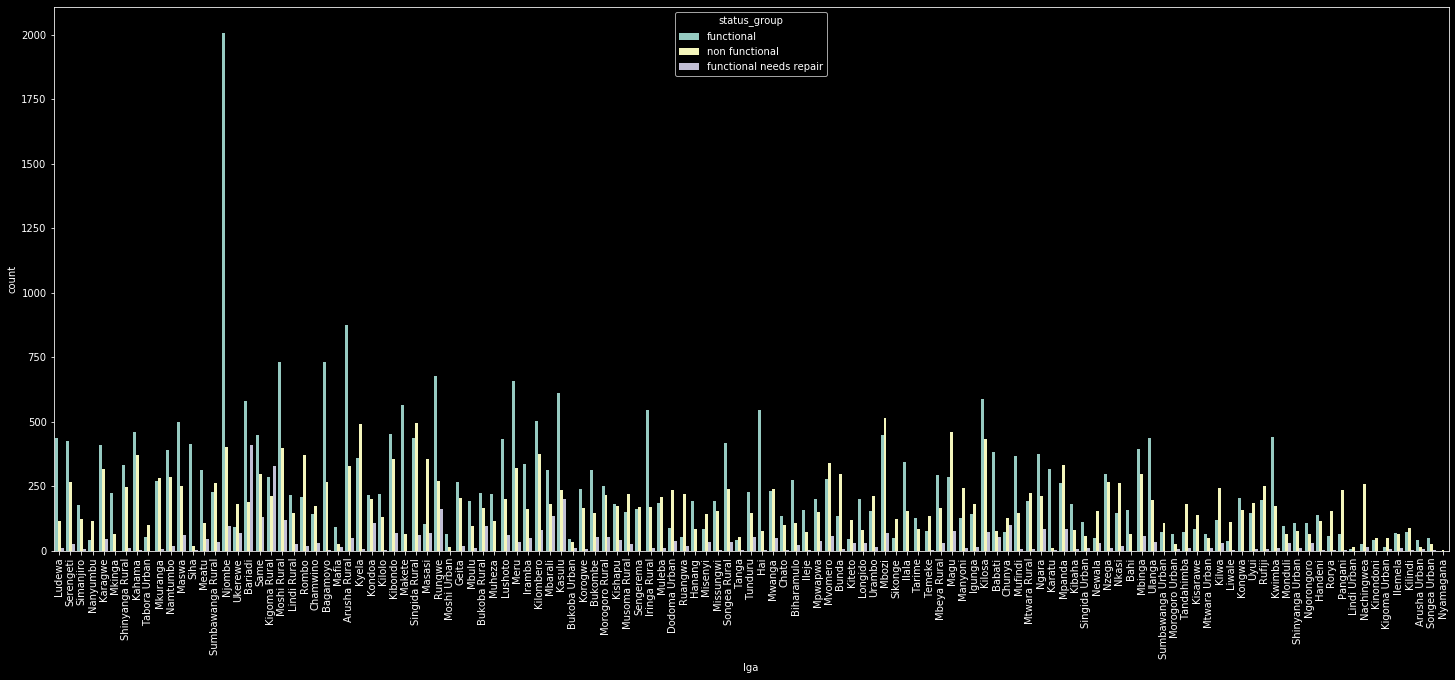

In [139]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_data, x='lga', hue='status_group')
plot.set_xticklabels(rotation=90, labels=plot.get_xticklabels())

In [140]:
# Too Large
# plt.figure(figsize=(16, 9))
# plot = sbn.countplot(data=train_data, x='ward', hue='status_group')
# plot.set_xticklabels(rotation=90, labels=plot.get_xticklabels())

# Public meeting vs Status group

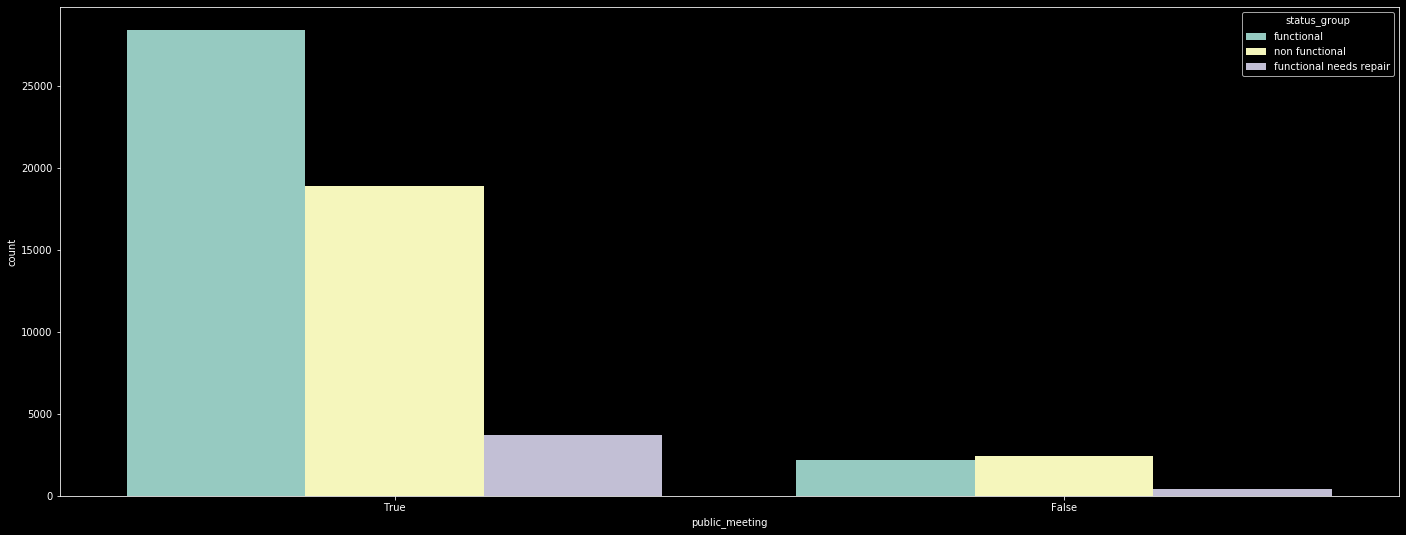

In [141]:
plt.figure(figsize=(24, 9))
sbn.countplot(data=train_data, x='public_meeting', hue='status_group')

# Population vs Status Group

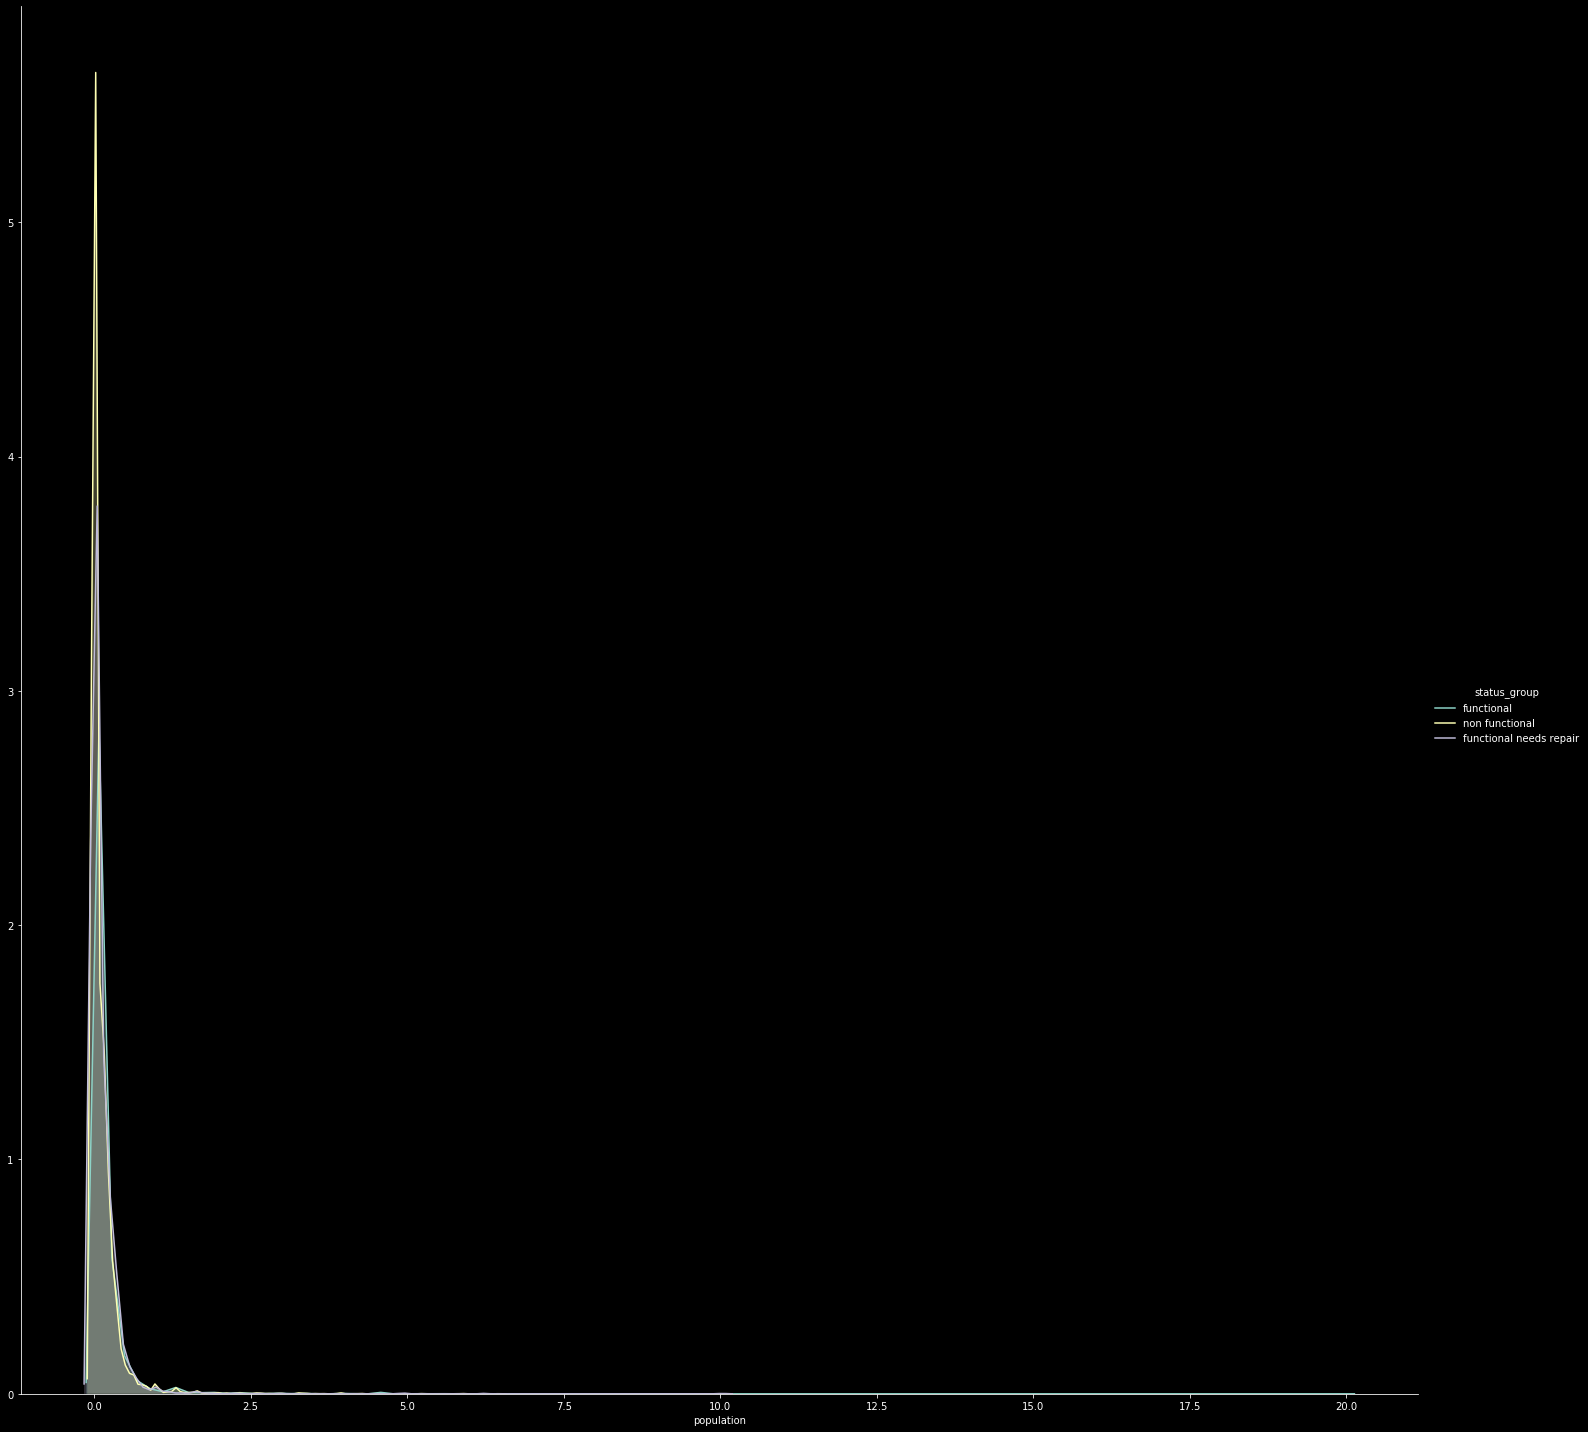

In [142]:
(sbn
  .FacetGrid(train_data, 
             hue='status_group',size=20)
  .map(sbn.kdeplot, 'population', shade=True)
 .add_legend()
)

# Construction year vs Status Group

(2013, 1300.6524747474748, 0)

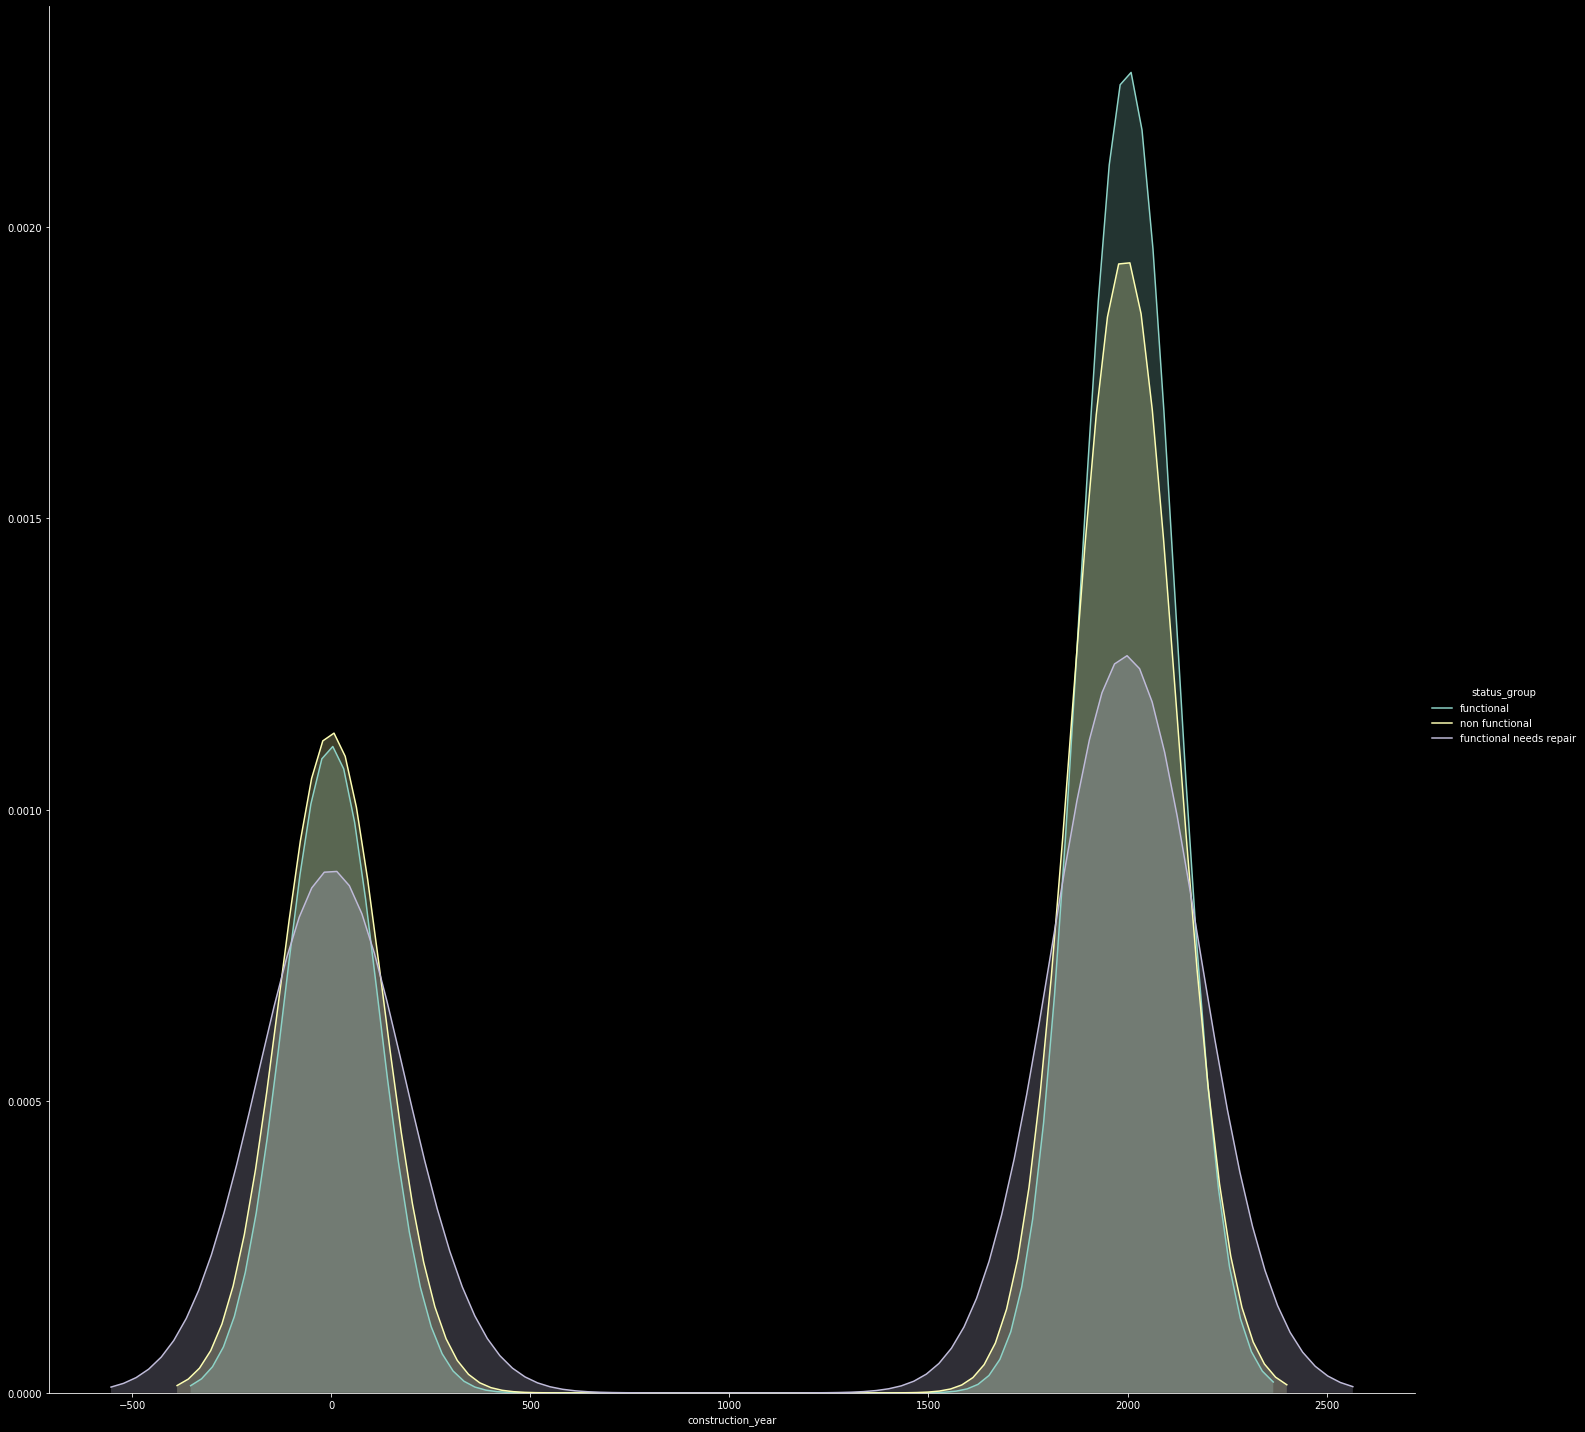

In [143]:
(sbn
  .FacetGrid(train_data, 
             hue='status_group',size=20)
  .map(sbn.kdeplot, 'construction_year', shade=True)
 .add_legend()
)
(train_data.construction_year.max(), train_data.construction_year.mean(), train_data.construction_year.min())


[Text(0, 0, '0'),
 Text(0, 0, '1960'),
 Text(0, 0, '1961'),
 Text(0, 0, '1962'),
 Text(0, 0, '1963'),
 Text(0, 0, '1964'),
 Text(0, 0, '1965'),
 Text(0, 0, '1966'),
 Text(0, 0, '1967'),
 Text(0, 0, '1968'),
 Text(0, 0, '1969'),
 Text(0, 0, '1970'),
 Text(0, 0, '1971'),
 Text(0, 0, '1972'),
 Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '1975'),
 Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '200

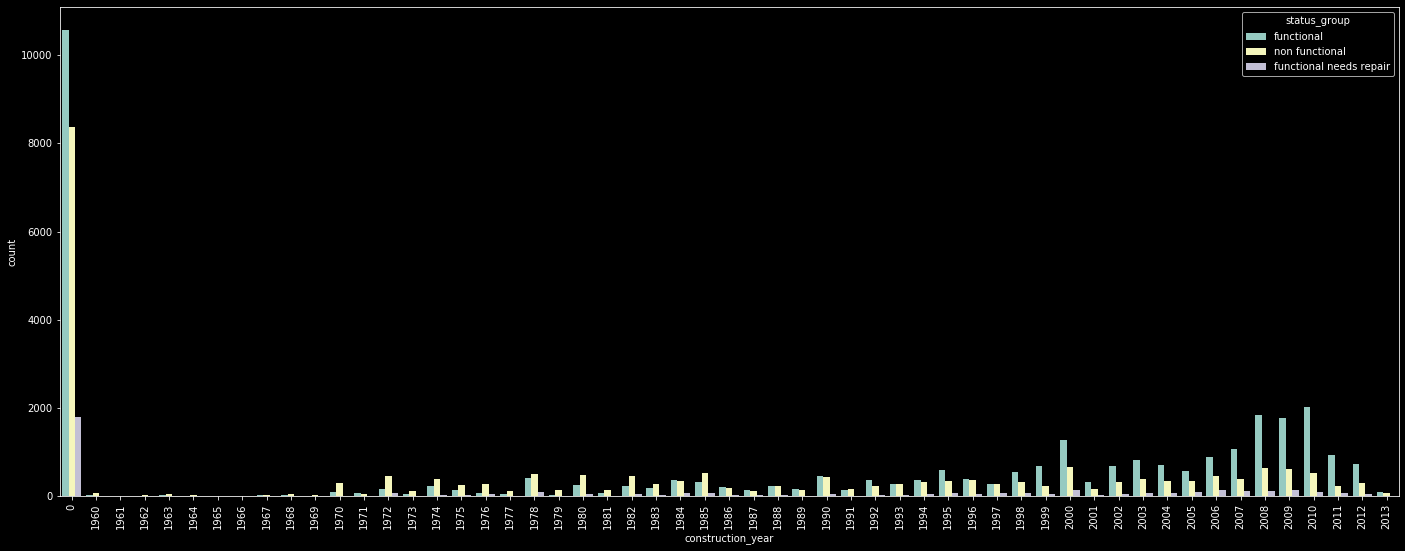

In [144]:
plt.figure(figsize=(24, 9))
plot = sbn.countplot(data=train_data, x='construction_year', hue='status_group')
plot.set_xticklabels(rotation=90, labels=plot.get_xticklabels())

# GPS Height vs Status Group

(20.0, 5.3027778955051685, 0.0)

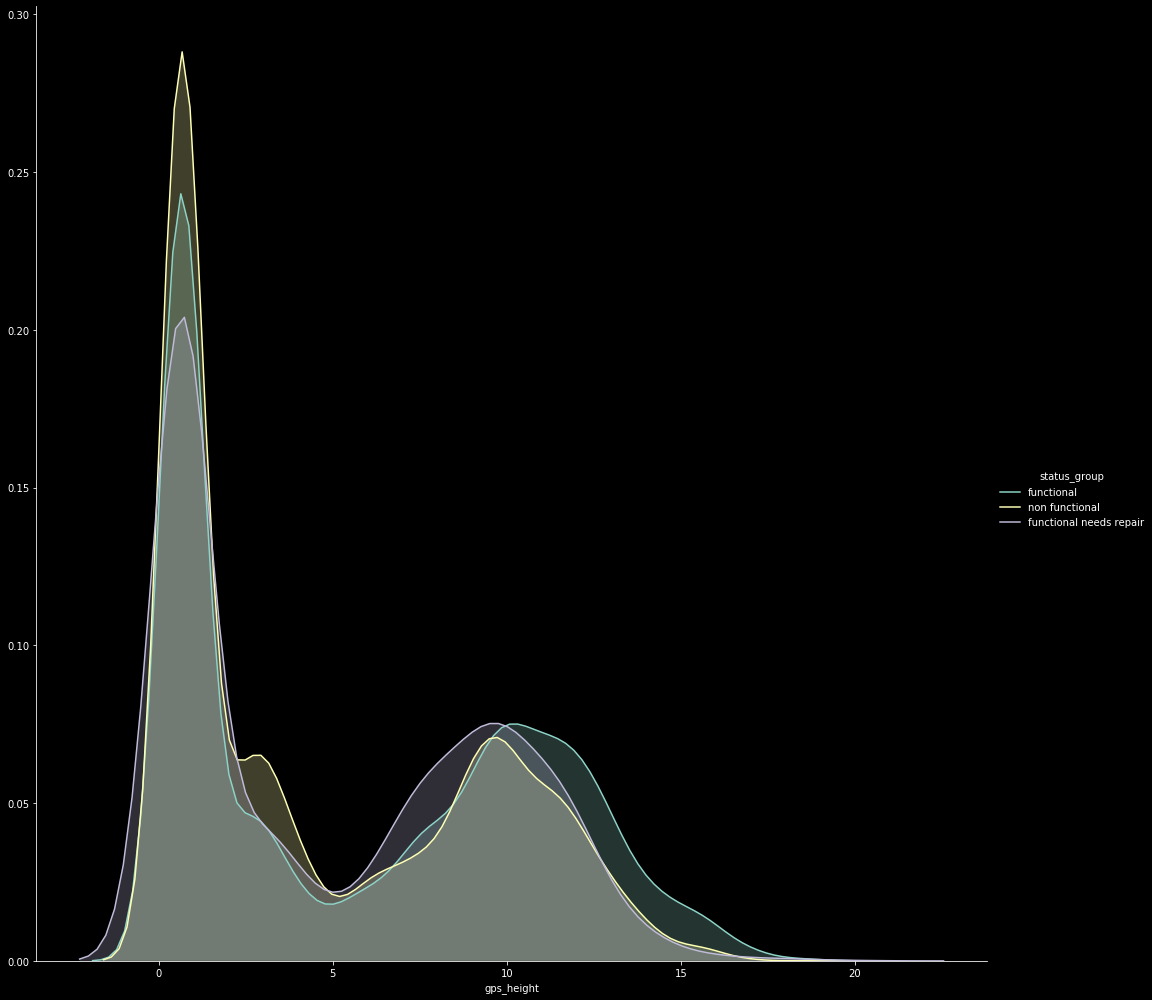

In [145]:
(sbn
  .FacetGrid(train_data, 
             hue='status_group',size=14)
  .map(sbn.kdeplot, 'gps_height', shade=True)
 .add_legend()
)
(train_data.gps_height.max(), train_data.gps_height.mean(), train_data.gps_height.min())

# Latitude Vs Status Group

(-2e-08, -5.706032659626431, -11.64944018)

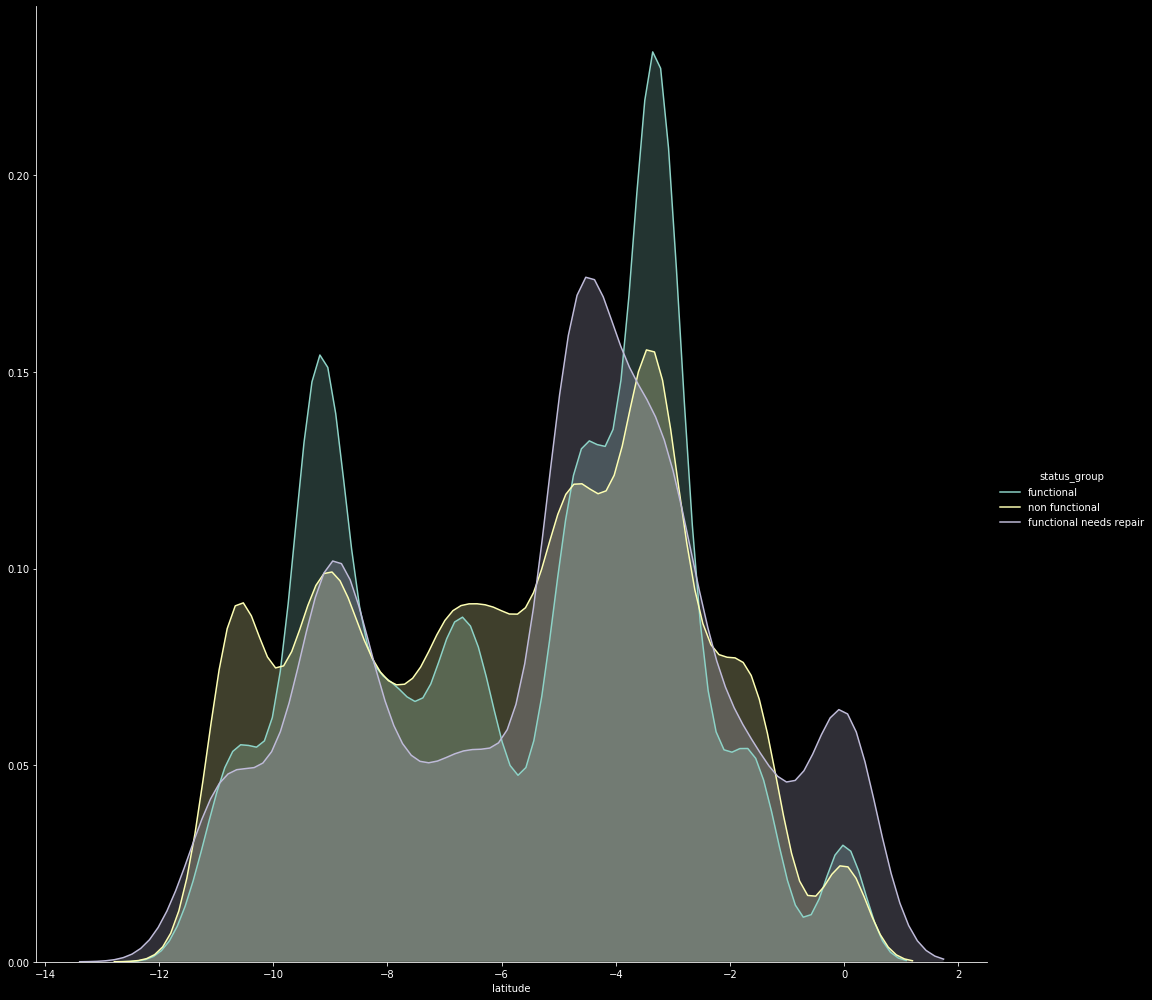

In [146]:
(sbn
  .FacetGrid(train_data, 
             hue='status_group',size=14)
  .map(sbn.kdeplot, 'latitude', shade=True)
 .add_legend()
)
(train_data.latitude.max(), train_data.latitude.mean(), train_data.latitude.min())

# Longitude vs Status Group

(40.34519307, 34.077426692028794, 0.0)

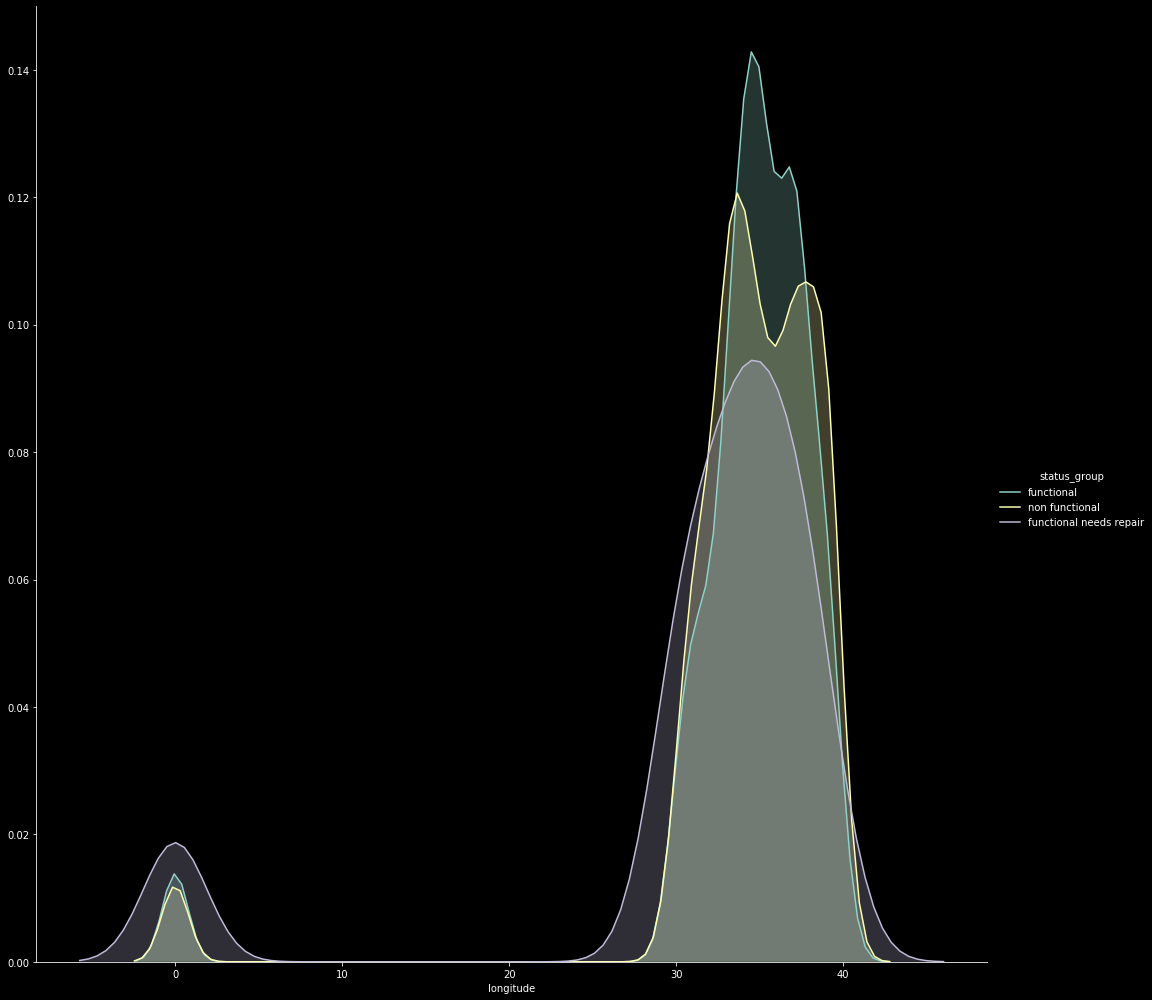

In [147]:
(sbn
  .FacetGrid(train_data, 
             hue='status_group',size=14)
  .map(sbn.kdeplot, 'longitude', shade=True)
 .add_legend()
)
(train_data.longitude.max(), train_data.longitude.mean(), train_data.longitude.min())

# Amount of Water available vs Status Group

(20.0, 0.03715305908505733, 0.0)

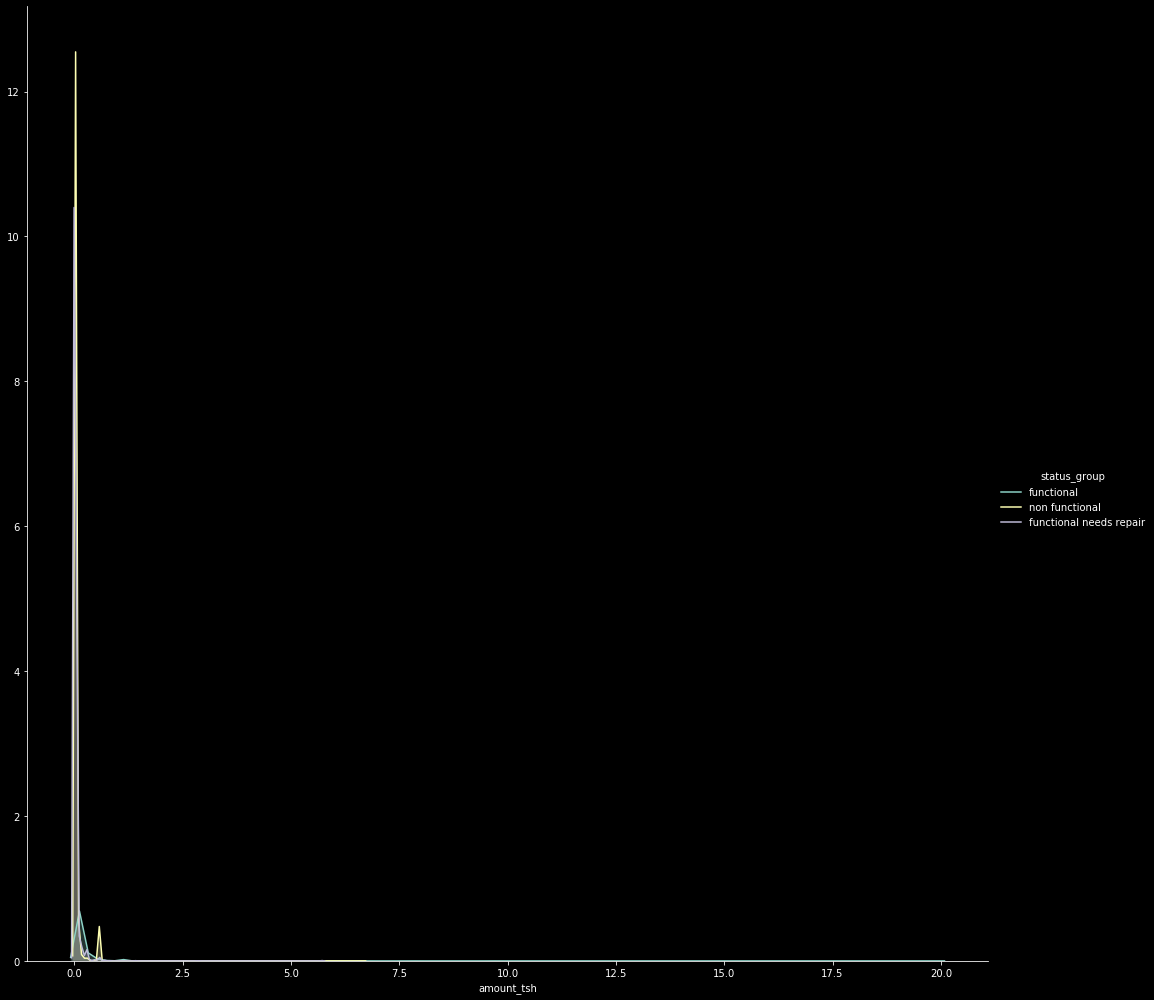

In [148]:
(sbn
  .FacetGrid(train_data, 
             hue='status_group',size=14)
  .map(sbn.kdeplot, 'amount_tsh', shade=True)
 .add_legend()
)
(train_data.amount_tsh.max(), train_data.amount_tsh.mean(), train_data.amount_tsh.min())

# Source Type vs Status Group

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

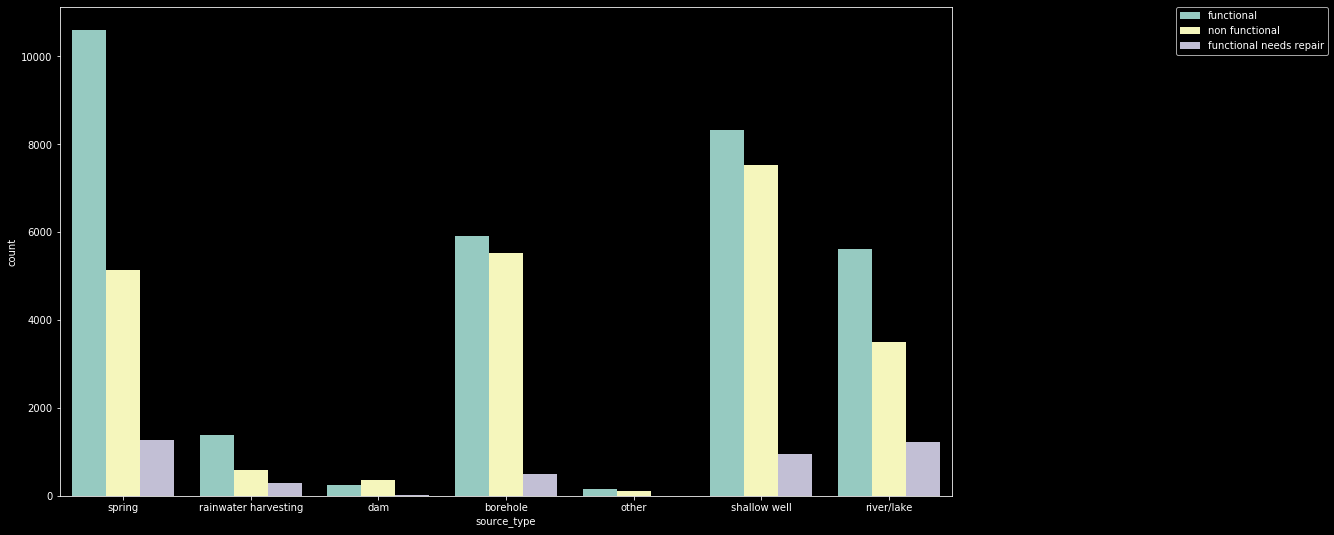

In [149]:
plt.figure(figsize=(16, 9))
sbn.countplot(data=train_data, x='source_type', hue='status_group')
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.0)
train_data.source_type.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

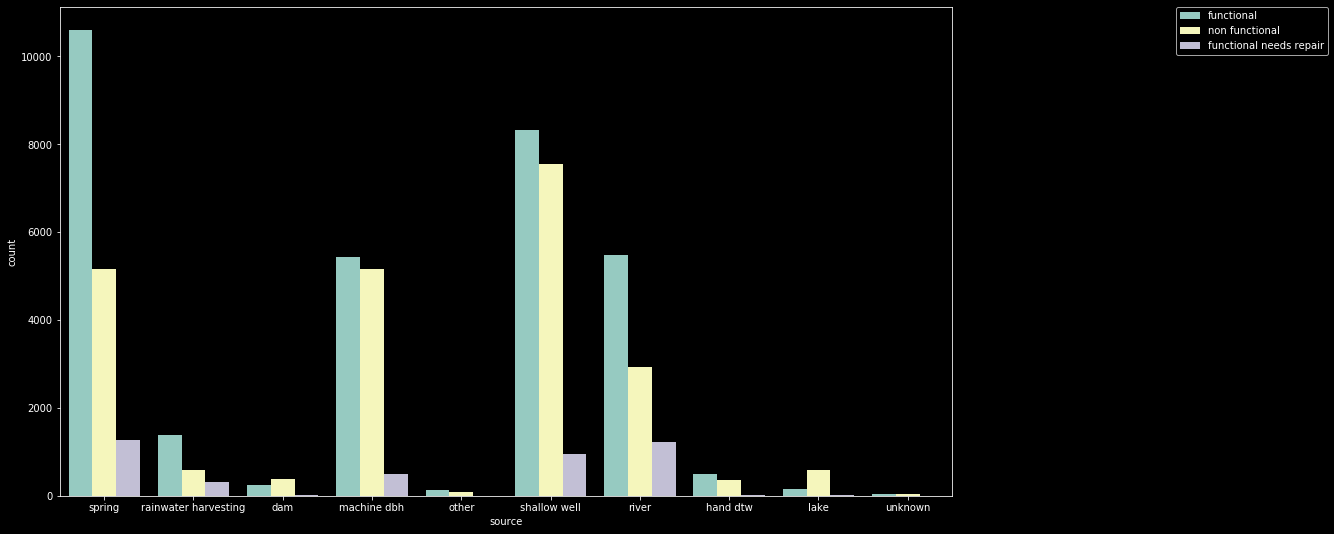

In [150]:
plt.figure(figsize=(16, 9))
sbn.countplot(data=train_data, x='source', hue='status_group')
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.0)
train_data.source.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

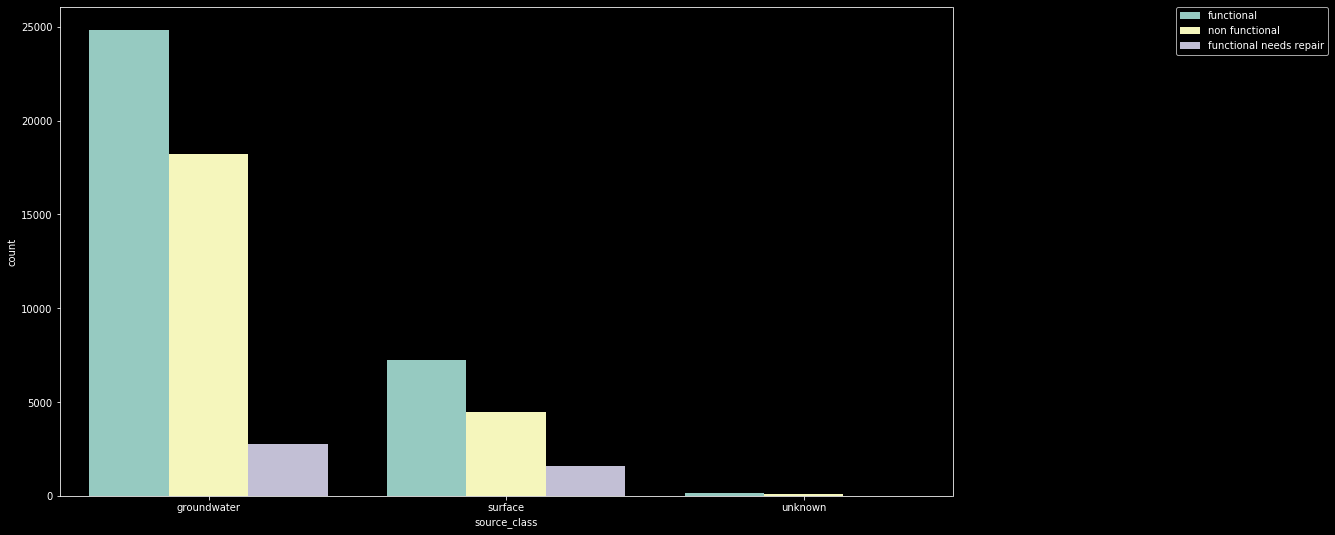

In [151]:
plt.figure(figsize=(16, 9))
sbn.countplot(data=train_data, x='source_class', hue='status_group')
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.0)
train_data.source_class.value_counts()

# Extractions Vs Status group

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

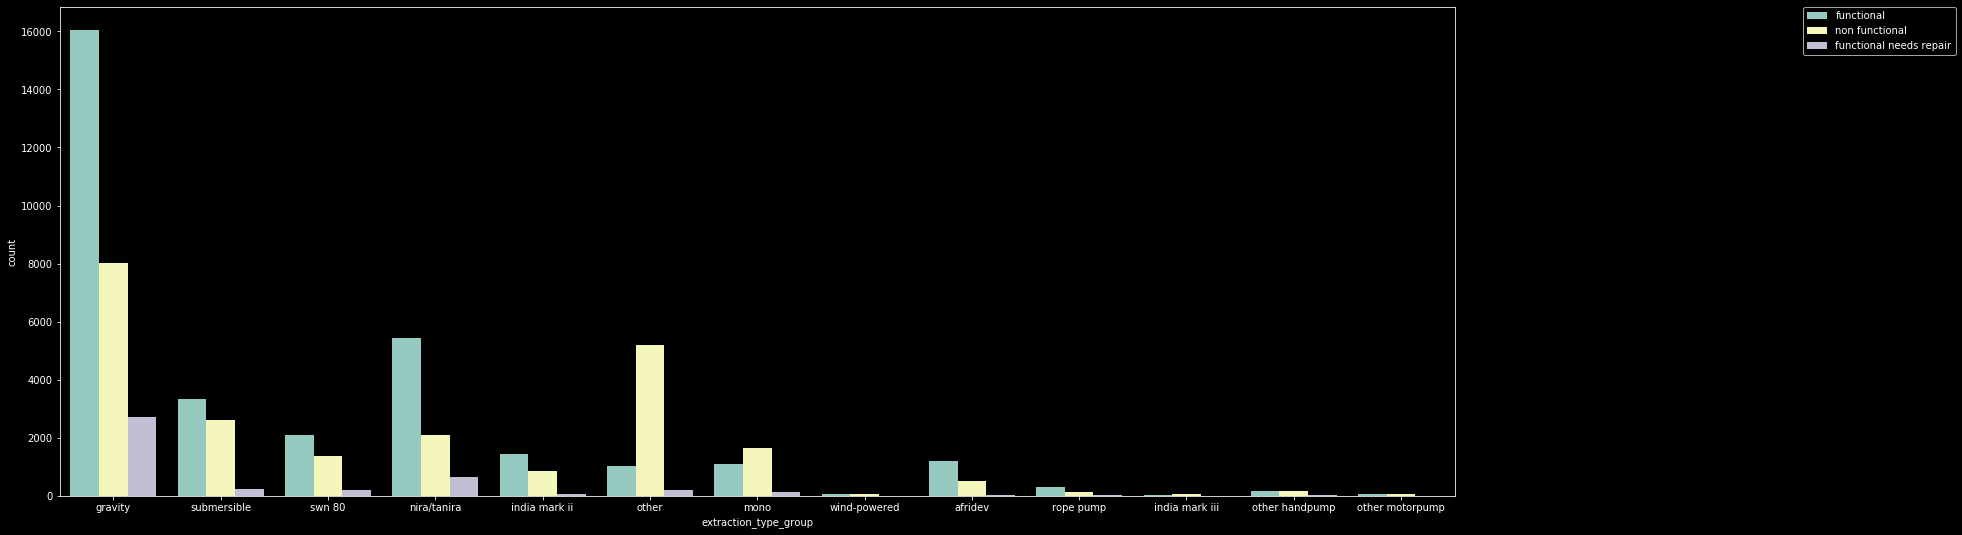

In [152]:
plt.figure(figsize=(25, 9))
sbn.countplot(data=train_data, x='extraction_type_group', hue='status_group')
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.0)
train_data.extraction_type_group.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

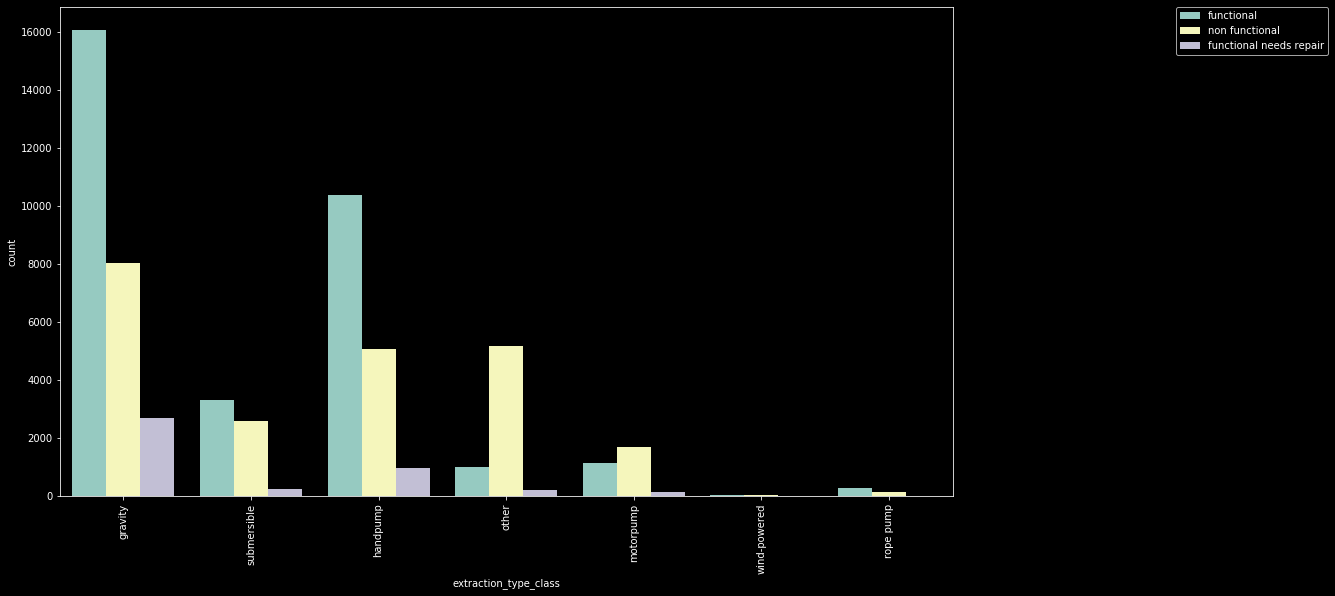

In [153]:
plt.figure(figsize=(16, 9))
plot = sbn.countplot(data=train_data, x='extraction_type_class', hue='status_group')
plot.set_xticklabels(rotation=90, labels=plot.get_xticklabels())
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.0)
train_data.extraction_type_class.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

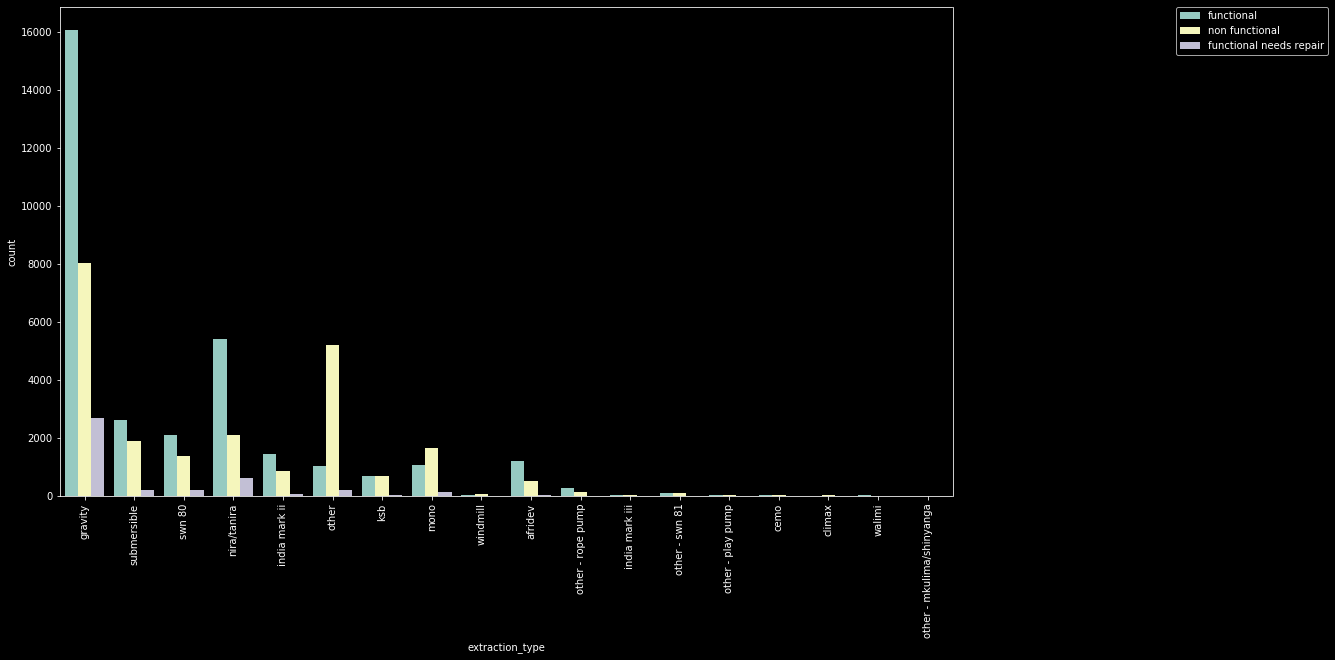

In [154]:
plt.figure(figsize=(16, 9))
plot = sbn.countplot(data=train_data, x='extraction_type', hue='status_group')
plot.set_xticklabels(rotation=90, labels=plot.get_xticklabels())
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.0)
train_data.extraction_type.value_counts()

# Waterpoint Types vs Status Groups

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

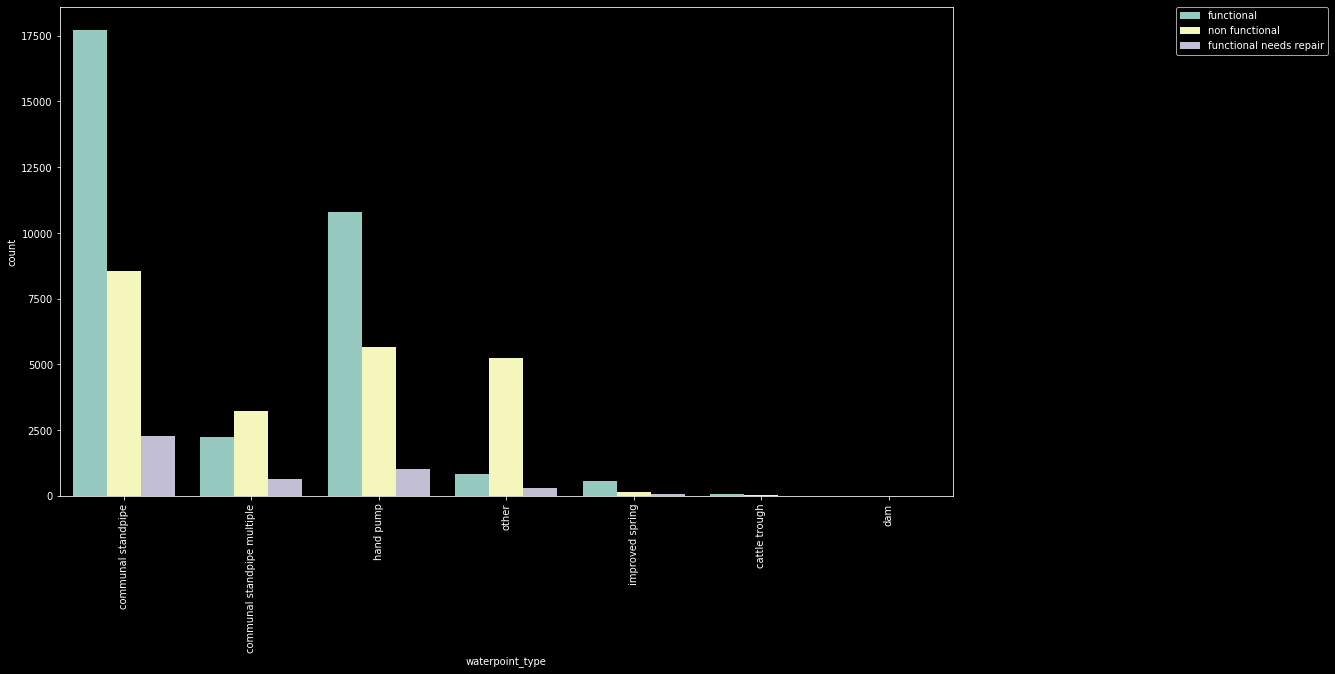

In [155]:
plt.figure(figsize=(16, 9))
plot = sbn.countplot(data=train_data, x='waterpoint_type', hue='status_group')
plot.set_xticklabels(rotation=90, labels=plot.get_xticklabels())
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.0)
train_data.waterpoint_type.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

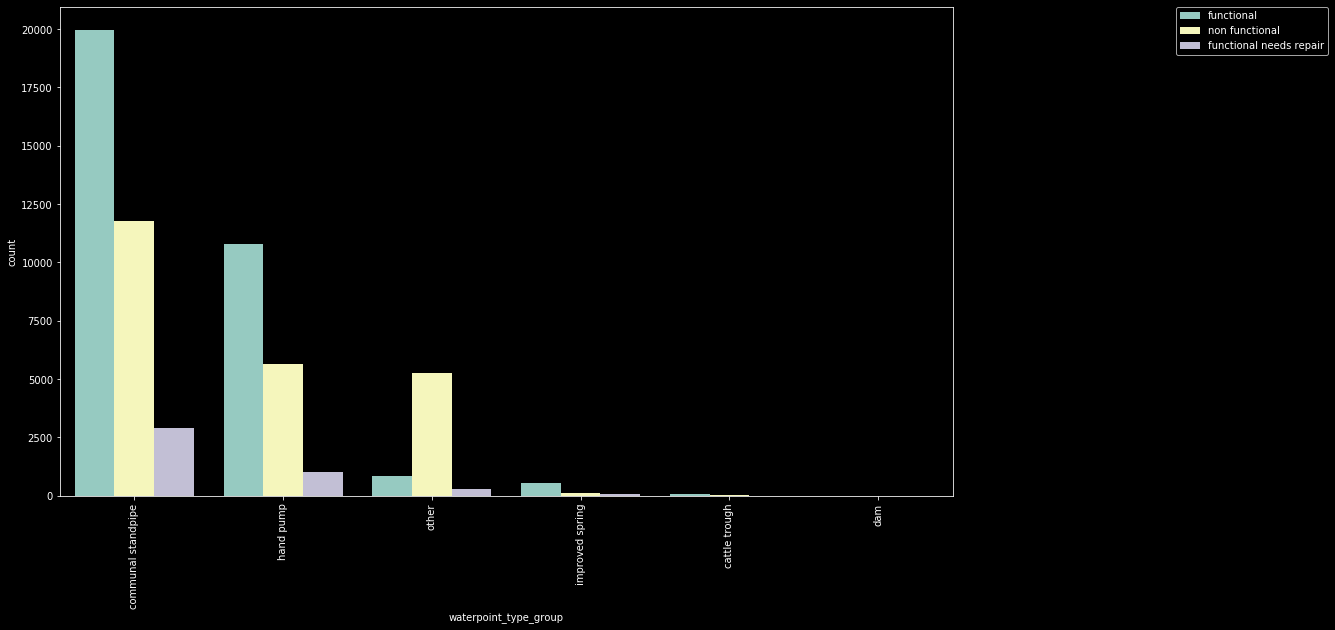

In [156]:
plt.figure(figsize=(16, 9))
plot = sbn.countplot(data=train_data, x='waterpoint_type_group', hue='status_group')
plot.set_xticklabels(rotation=90, labels=plot.get_xticklabels())
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.0)
train_data.waterpoint_type_group.value_counts()

In [157]:
train_data.longitude.replace(0.0, np.nan, inplace=True)
train_data.latitude.replace(0.0, np.nan, inplace=True)
train_data.construction_year.replace(0.0, np.nan, inplace=True)

In [158]:
train_data.groupby(['district_code', 'region', 'construction_year']).size()

district_code  region     construction_year
0              Dodoma     0                     23
1              Arusha     0                      3
                          1980                   2
                          1990                  23
                          2000                 137
                                              ... 
63             Mtwara     2011                   2
                          2012                   8
               Pwani      0                     37
67             Pwani      0                      6
80             Shinyanga  0                     12
Length: 2374, dtype: int64

In [159]:
train_data.latitude.fillna(train_data.groupby(['region', 'district_code'])['latitude'].transform('mean'), inplace=True)

In [160]:
train_data.longitude.fillna(train_data.groupby(['region', 'district_code'])['longitude'].transform('mean'), inplace=True)

In [161]:
train_data.longitude.fillna(train_data.groupby(['region'])['longitude'].transform('mean'), inplace=True)

In [162]:
train_data.construction_year.fillna(train_data.groupby(['region', 'district_code'])['construction_year'].transform('median'), inplace=True)

In [163]:
train_data.construction_year.fillna(train_data.groupby(['region'])['construction_year'].transform('median'), inplace=True)

In [164]:
train_data.construction_year.fillna(train_data.groupby(['district_code'])['construction_year'].transform('median'), inplace=True)

In [165]:
train_data.construction_year.fillna(train_data['construction_year'].median(), inplace=True)

In [166]:
train_data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [167]:
str_to_date = pd.to_datetime(train_data.date_recorded).dt.strftime("%Y/%m")
str_to_date.head(5)
train_data['date_recorded'] = str_to_date

In [168]:
train_data.date_recorded.head(5)

0    2011/03
1    2013/03
2    2013/02
3    2013/01
4    2011/07
Name: date_recorded, dtype: object

2011/03    11796
2013/02     9611
2011/07     6643
2013/01     6252
2013/03     6135
2012/10     5179
2011/04     3631
2011/08     3188
2011/02     2791
2012/11     1018
2013/04      337
2013/05      304
2013/07      284
2013/12      274
2013/06      248
2013/09      241
2012/12      225
2013/11      218
2013/10      193
2013/08      174
2011/11      113
2011/12      108
2011/01       99
2011/06       97
2011/10       93
2011/09       85
2011/05       30
2004/12       14
2004/03        5
2004/04        2
2004/05        2
2004/08        2
2004/09        2
2012/01        2
2002/10        1
2004/06        1
2004/07        1
2004/01        1
Name: date_recorded, dtype: int64

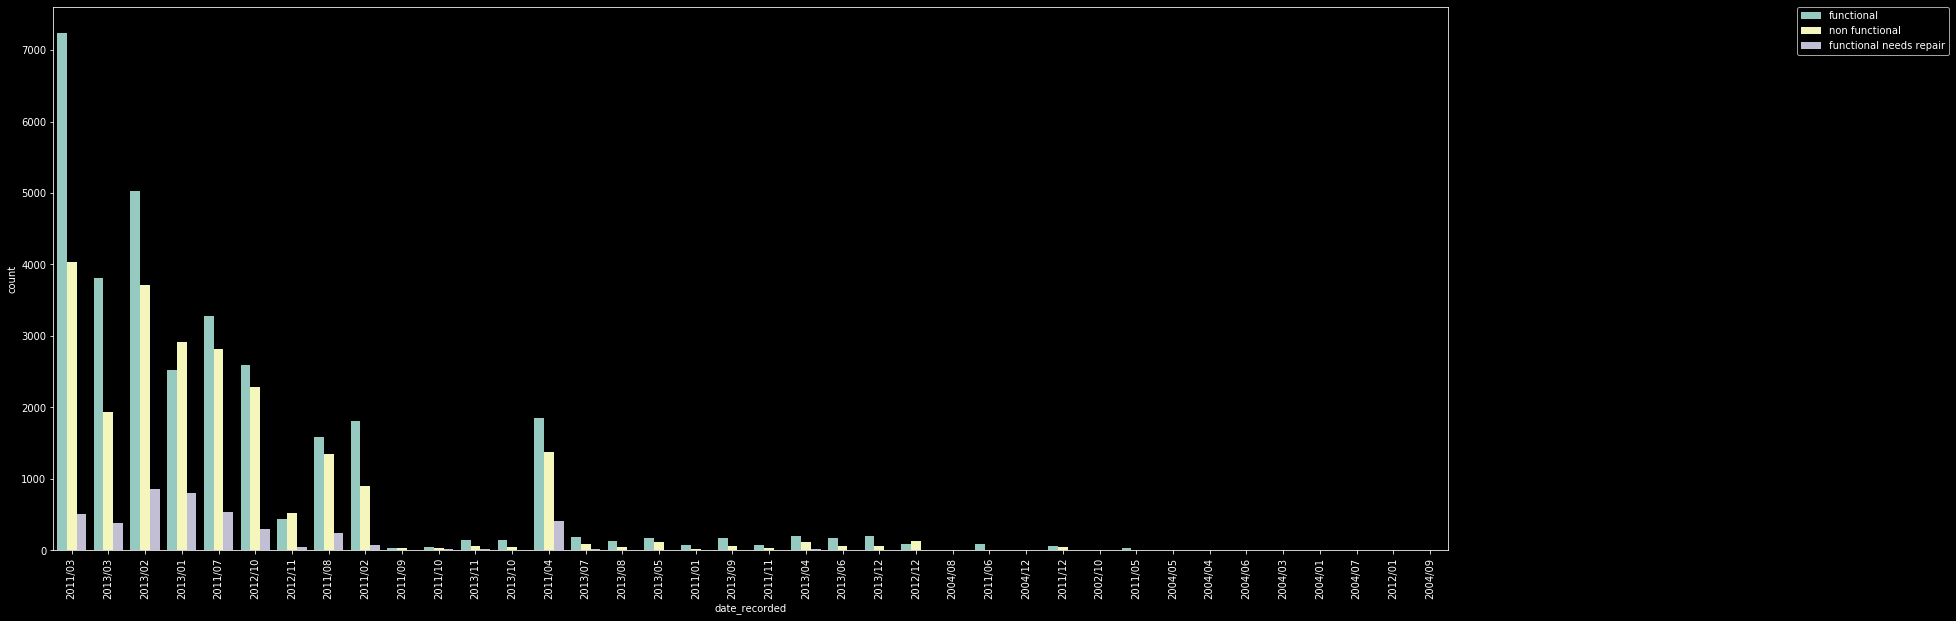

In [169]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_data, x='date_recorded', hue='status_group')
plot.set_xticklabels(rotation=90, labels=plot.get_xticklabels())
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.0)
train_data.date_recorded.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

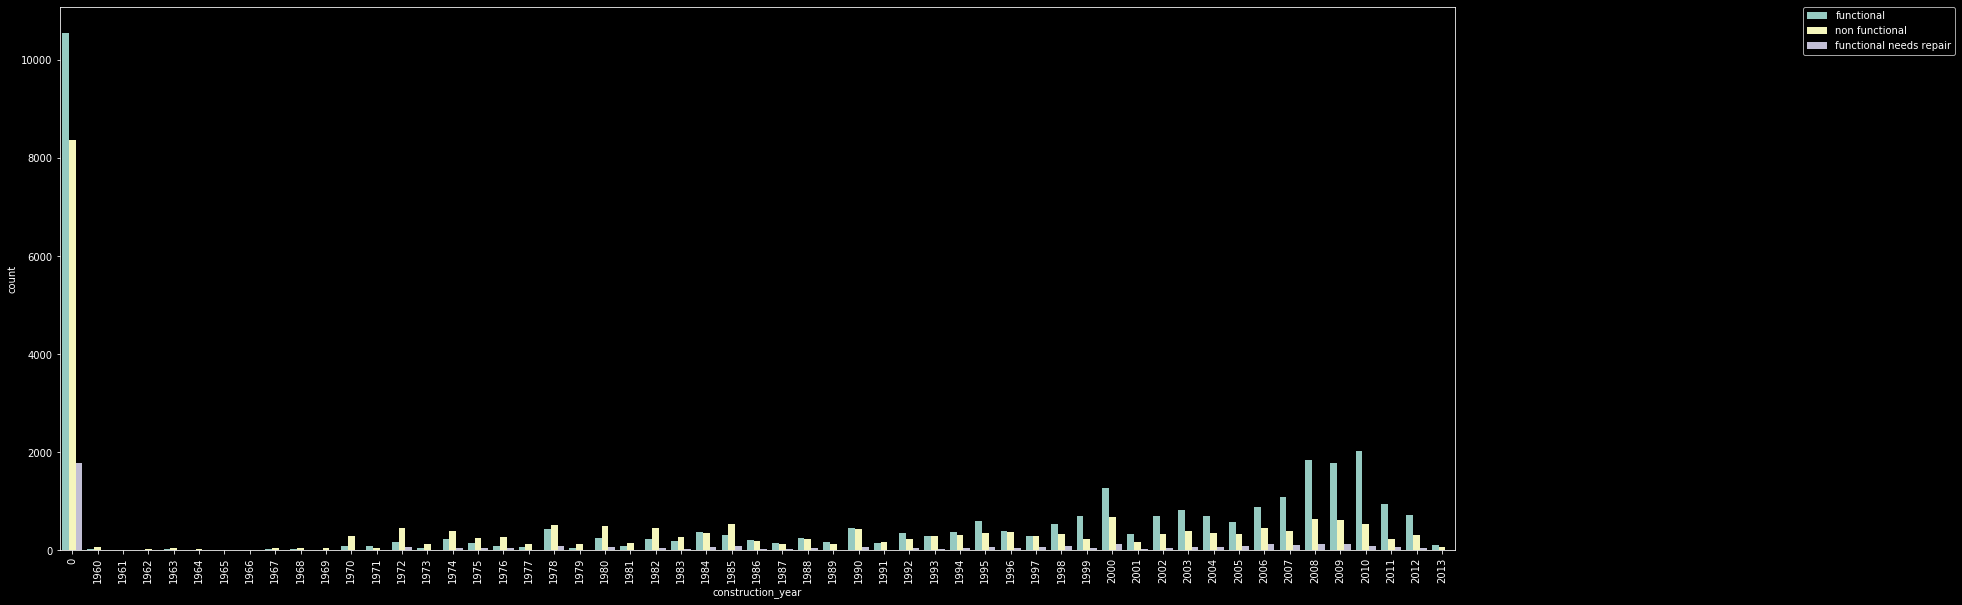

In [170]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_data, x='construction_year', hue='status_group')
plot.set_xticklabels(rotation=90, labels=plot.get_xticklabels())
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.0)
train_data.construction_year.value_counts()

In [171]:
train_data.construction_year.min()

0

In [172]:
print(train_data.date_recorded.head(5))
train_data.date_recorded = pd.to_datetime(train_values.date_recorded)
print(train_data.date_recorded.head(5))

0    2011/03
1    2013/03
2    2013/02
3    2013/01
4    2011/07
Name: date_recorded, dtype: object
0   2011-03-14
1   2013-03-06
2   2013-02-25
3   2013-01-28
4   2011-07-13
Name: date_recorded, dtype: datetime64[ns]


In [173]:
values = list(train_data.construction_year.values)
print(len(values))
values = [value for value in values if value != 0]
print(len(values))

59400
38691


In [174]:
from statistics import mode
train_data.construction_year.replace(0, mode(values), inplace=True)
train_data.construction_year.head(5)

0    1999
1    2010
2    2009
3    1986
4    2010
Name: construction_year, dtype: int64

In [175]:
train_data['operational_years'] = train_data.date_recorded.dt.year - train_data.construction_year
train_data.operational_years.head(10)

0    12
1     3
2     4
3    27
4     1
5     2
6     2
7     2
8     2
9     1
Name: operational_years, dtype: int64

(53, 10.51010101010101, -8)

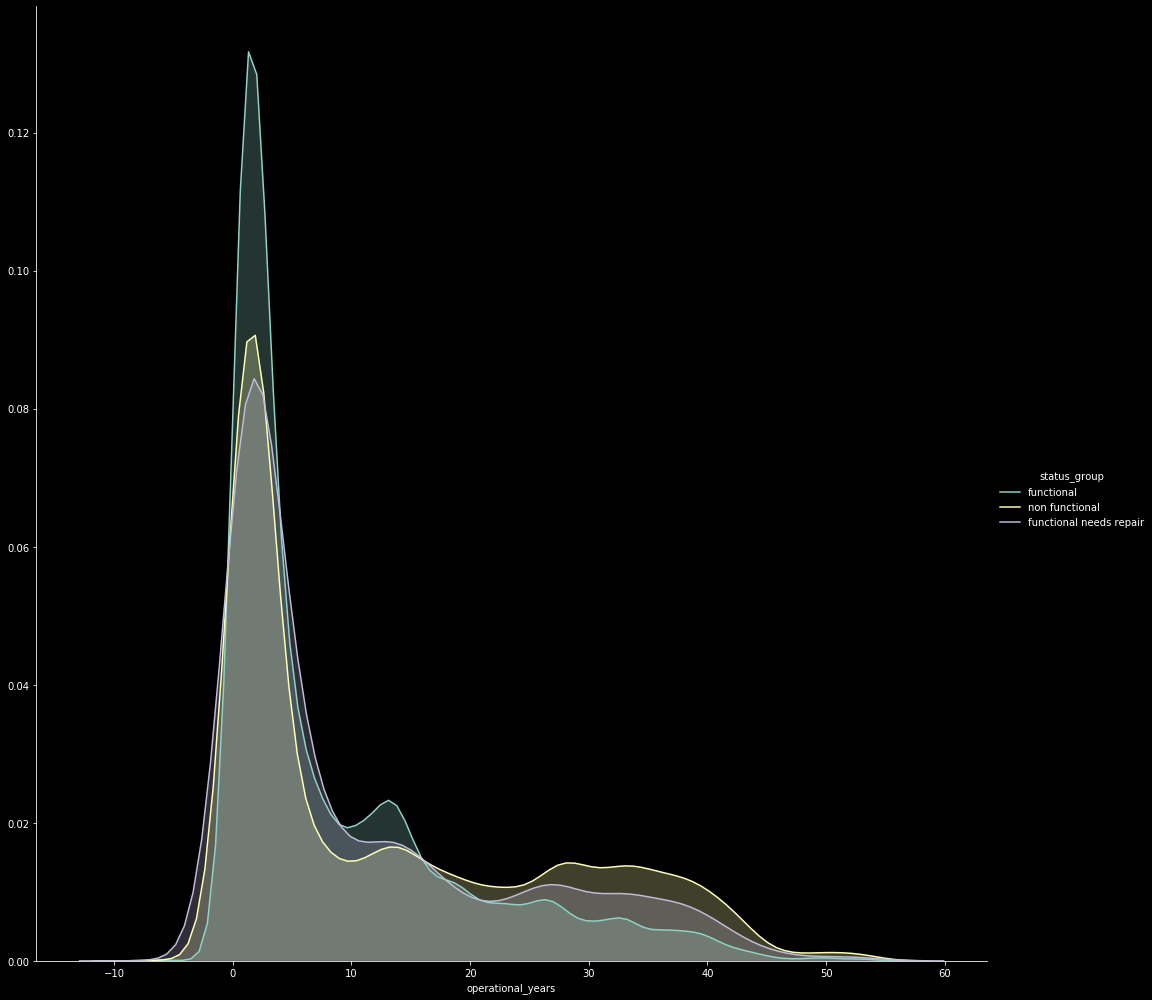

In [176]:
(sbn
  .FacetGrid(train_data, 
             hue='status_group',size=14)
  .map(sbn.kdeplot, 'operational_years', shade=True)
 .add_legend()
)
(train_data.operational_years.max(), train_data.operational_years.mean(), train_data.operational_years.min())

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

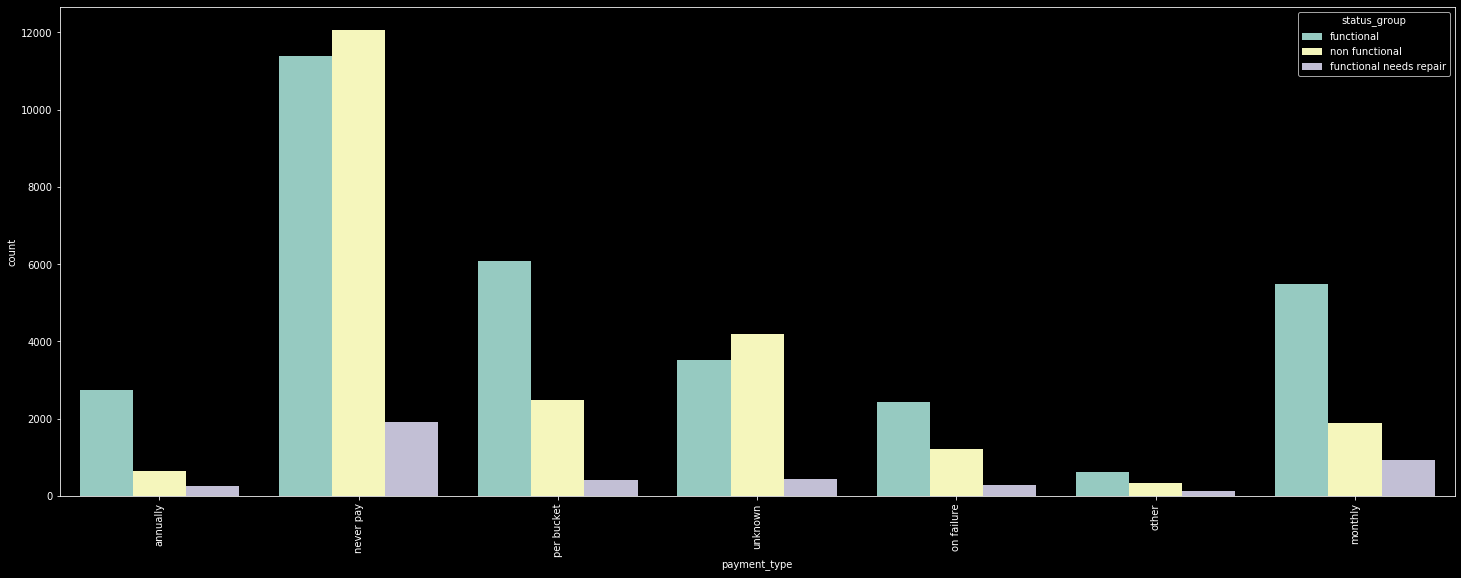

In [177]:
plt.figure(figsize=(25, 9))
plot = sbn.countplot(data=train_data,x='payment_type',hue='status_group')
plot.set_xticklabels(rotation=90, labels=plot.get_xticklabels())
train_data.payment_type.value_counts()

# Data Cleaning

In [178]:
irrelavant_features = ['wpt_name','num_private','subvillage','region_code','recorded_by']
train_data.drop(irrelavant_features, axis=1, inplace=True)

In [179]:
train_data.groupby(['management', 'management_group']).size()

management        management_group
company           commercial            685
other             other                 844
other - school    other                  99
parastatal        parastatal           1768
private operator  commercial           1971
trust             commercial             78
unknown           unknown               561
vwc               user-group          40507
water authority   commercial            904
water board       user-group           2933
wua               user-group           2535
wug               user-group           6515
dtype: int64

In [180]:
train_data.drop('management_group', axis=1, inplace=True)

In [181]:
train_data.groupby(['extraction_type_group','extraction_type_class','extraction_type']).size() 

extraction_type_group  extraction_type_class  extraction_type          
afridev                handpump               afridev                       1770
gravity                gravity                gravity                      26780
india mark ii          handpump               india mark ii                 2400
india mark iii         handpump               india mark iii                  98
mono                   motorpump              mono                          2865
nira/tanira            handpump               nira/tanira                   8154
other                  other                  other                         6430
other handpump         handpump               other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
other motorpump        motorpump     

In [182]:
train_data.drop('extraction_type_group', axis=1, inplace=True)

In [183]:
train_data.drop('extraction_type_class', axis=1, inplace=True)

In [184]:
train_data.groupby(['scheme_management', 'scheme_name']).size()

scheme_management  scheme_name              
Company            BFFS                           1
                   Bagamoyo Wate                 60
                   Bagamoyo wate                210
                   Borehole                       1
                   Borehole drilling project      1
                                               ... 
Water authority    Yongoma                       16
                   Zepalama                       5
                   no scheme                      9
                   pump                           2
                   water supply at Kalebejo       1
Length: 3077, dtype: int64

In [185]:
train_data.drop('scheme_name',axis=1,inplace=True)

In [186]:
train_data.groupby(['payment', 'payment_type']).size()

payment                payment_type
never pay              never pay       25348
other                  other            1054
pay annually           annually         3642
pay monthly            monthly          8300
pay per bucket         per bucket       8985
pay when scheme fails  on failure       3914
unknown                unknown          8157
dtype: int64

In [187]:
train_data.drop('payment',axis=1,inplace=True)

In [188]:
train_data.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

In [189]:
train_data.drop('quality_group',axis=1,inplace=True)

In [190]:
train_data.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

In [191]:
train_data.drop('quantity_group',axis=1,inplace=True)

In [192]:
train_data.groupby(['source', 'source_type', 'source_class']).size()

source                source_type           source_class
dam                   dam                   surface           656
hand dtw              borehole              groundwater       874
lake                  river/lake            surface           765
machine dbh           borehole              groundwater     11075
other                 other                 unknown           212
rainwater harvesting  rainwater harvesting  surface          2295
river                 river/lake            surface          9612
shallow well          shallow well          groundwater     16824
spring                spring                groundwater     17021
unknown               other                 unknown            66
dtype: int64

In [193]:
train_data.drop('source_type',axis=1,inplace=True)

In [194]:
train_data.drop('source_class',axis=1,inplace=True)

In [195]:
train_data.groupby(['waterpoint_type', 'waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              116
communal standpipe           communal standpipe       28522
communal standpipe multiple  communal standpipe        6103
dam                          dam                          7
hand pump                    hand pump                17488
improved spring              improved spring            784
other                        other                     6380
dtype: int64

In [196]:
train_data.drop('waterpoint_type_group',axis=1,inplace=True)

In [197]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 59400 non-null  int64         
 1   amount_tsh         59400 non-null  float64       
 2   date_recorded      59400 non-null  datetime64[ns]
 3   funder             55765 non-null  object        
 4   gps_height         59400 non-null  float64       
 5   installer          55745 non-null  object        
 6   longitude          59400 non-null  float64       
 7   latitude           59400 non-null  float64       
 8   basin              59400 non-null  object        
 9   region             59400 non-null  object        
 10  district_code      59400 non-null  int64         
 11  lga                59400 non-null  object        
 12  ward               59400 non-null  object        
 13  population         59400 non-null  float64       
 14  public

In [198]:
print(train_data.groupby(['lga', 'ward','status_group']).size())

lga           ward     status_group           
Arusha Rural  Bangata  functional                 21
                       functional needs repair     2
                       non functional             10
              Bwawani  functional                 12
                       non functional             25
                                                  ..
Uyui          Ufuluma  non functional             10
              Upuge    functional                  7
                       non functional             11
              Usagali  functional                  8
                       non functional             17
Length: 5070, dtype: int64


In [199]:
train_data.drop('ward',axis=1,inplace=True)

In [200]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 59400 non-null  int64         
 1   amount_tsh         59400 non-null  float64       
 2   date_recorded      59400 non-null  datetime64[ns]
 3   funder             55765 non-null  object        
 4   gps_height         59400 non-null  float64       
 5   installer          55745 non-null  object        
 6   longitude          59400 non-null  float64       
 7   latitude           59400 non-null  float64       
 8   basin              59400 non-null  object        
 9   region             59400 non-null  object        
 10  district_code      59400 non-null  int64         
 11  lga                59400 non-null  object        
 12  population         59400 non-null  float64       
 13  public_meeting     56066 non-null  object        
 14  scheme

In [201]:
train_data.groupby(['installer', 'funder','status_group']).size()

installer       funder                  status_group           
-               Government Of Tanzania  functional                   1
                                        non functional               1
                Kalebejo Parish         functional                   1
0               0                       functional                 445
                                        functional needs repair      3
                                                                  ... 
wizara ya maji  Serikali                functional                   2
world           World Bank              functional needs repair      1
                                        non functional               3
world banks     World Bank              non functional               1
world vision    World Vision            functional                   1
Length: 5188, dtype: int64

In [202]:
train_data.drop('installer',axis=1,inplace=True)

In [203]:
train_data.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
longitude               0
latitude                0
basin                   0
region                  0
district_code           0
lga                     0
population              0
public_meeting       3334
scheme_management    3877
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
status_group            0
operational_years       0
dtype: int64

In [204]:
train_data.drop('public_meeting', axis=1, inplace=True)
train_data.drop('permit', axis=1, inplace=True)

In [205]:
train_data.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
longitude               0
latitude                0
basin                   0
region                  0
district_code           0
lga                     0
population              0
scheme_management    3877
construction_year       0
extraction_type         0
management              0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
status_group            0
operational_years       0
dtype: int64

In [206]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 59400 non-null  int64         
 1   amount_tsh         59400 non-null  float64       
 2   date_recorded      59400 non-null  datetime64[ns]
 3   funder             55765 non-null  object        
 4   gps_height         59400 non-null  float64       
 5   longitude          59400 non-null  float64       
 6   latitude           59400 non-null  float64       
 7   basin              59400 non-null  object        
 8   region             59400 non-null  object        
 9   district_code      59400 non-null  int64         
 10  lga                59400 non-null  object        
 11  population         59400 non-null  float64       
 12  scheme_management  55523 non-null  object        
 13  construction_year  59400 non-null  int64         
 14  extrac

In [207]:
train_data.waterpoint_type = train_data.waterpoint_type.str.lower()
train_data.funder = train_data.funder.str.lower()
train_data.basin = train_data.basin.str.lower()
train_data.region = train_data.region.str.lower()
train_data.source = train_data.source.str.lower()
train_data.lga = train_data.lga.str.lower()
train_data.management = train_data.management.str.lower()
train_data.quantity = train_data.quantity.str.lower()
train_data.water_quality = train_data.water_quality.str.lower()
train_data.payment_type= train_data.payment_type.str.lower()
train_data.extraction_type= train_data.extraction_type.str.lower()

In [208]:

train_data["funder"].fillna("other", inplace=True)
train_data["scheme_management"].fillna("other", inplace=True)
#train_data["installer"].fillna("other", inplace=True)
print(train_data.isnull().sum())
train_data.drop('date_recorded', axis=1, inplace=True)
train_data.drop('construction_year', axis=1, inplace=True)
train_data.info()
train_data.quantity.head(5)


id                   0
amount_tsh           0
date_recorded        0
funder               0
gps_height           0
longitude            0
latitude             0
basin                0
region               0
district_code        0
lga                  0
population           0
scheme_management    0
construction_year    0
extraction_type      0
management           0
payment_type         0
water_quality        0
quantity             0
source               0
waterpoint_type      0
status_group         0
operational_years    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   funder             59400 non-null  object 
 3   gps_height         59400 non-null  float64
 4   longitude          59400 non-null  float64
 5   latitude

0          enough
1    insufficient
2          enough
3             dry
4        seasonal
Name: quantity, dtype: object

In [209]:
test_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [210]:
cols = list(train_data.columns.values)
test_values['operational_years'] = pd.to_datetime(test_values.date_recorded).dt.year - test_values.construction_year
test_values = test_values[cols]

In [211]:
test_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 14849
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14850 non-null  int64  
 1   amount_tsh         14850 non-null  float64
 2   funder             13981 non-null  object 
 3   gps_height         14850 non-null  int64  
 4   longitude          14850 non-null  float64
 5   latitude           14850 non-null  float64
 6   basin              14850 non-null  object 
 7   region             14850 non-null  object 
 8   district_code      14850 non-null  int64  
 9   lga                14850 non-null  object 
 10  population         14850 non-null  int64  
 11  scheme_management  13881 non-null  object 
 12  extraction_type    14850 non-null  object 
 13  management         14850 non-null  object 
 14  payment_type       14850 non-null  object 
 15  water_quality      14850 non-null  object 
 16  quantity           148

In [212]:
test_values["funder"].fillna("other", inplace=True)
test_values["scheme_management"].fillna("other", inplace=True)

In [213]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   funder             59400 non-null  object 
 3   gps_height         59400 non-null  float64
 4   longitude          59400 non-null  float64
 5   latitude           59400 non-null  float64
 6   basin              59400 non-null  object 
 7   region             59400 non-null  object 
 8   district_code      59400 non-null  int64  
 9   lga                59400 non-null  object 
 10  population         59400 non-null  float64
 11  scheme_management  59400 non-null  object 
 12  extraction_type    59400 non-null  object 
 13  management         59400 non-null  object 
 14  payment_type       59400 non-null  object 
 15  water_quality      59400 non-null  object 
 16  quantity           594

In [214]:
test_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 14849
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14850 non-null  int64  
 1   amount_tsh         14850 non-null  float64
 2   funder             14850 non-null  object 
 3   gps_height         14850 non-null  int64  
 4   longitude          14850 non-null  float64
 5   latitude           14850 non-null  float64
 6   basin              14850 non-null  object 
 7   region             14850 non-null  object 
 8   district_code      14850 non-null  int64  
 9   lga                14850 non-null  object 
 10  population         14850 non-null  int64  
 11  scheme_management  14850 non-null  object 
 12  extraction_type    14850 non-null  object 
 13  management         14850 non-null  object 
 14  payment_type       14850 non-null  object 
 15  water_quality      14850 non-null  object 
 16  quantity           148

In [215]:
test_values.waterpoint_type = test_values.waterpoint_type.str.lower()
test_values.funder = test_values.funder.str.lower()
test_values.basin = test_values.basin.str.lower()
test_values.region = test_values.region.str.lower()
test_values.source = test_values.source.str.lower()
test_values.lga = test_values.lga.str.lower()
test_values.management = test_values.management.str.lower()
test_values.quantity = test_values.quantity.str.lower()
test_values.water_quality = test_values.water_quality.str.lower()
test_values.payment_type= test_values.payment_type.str.lower()
test_values.extraction_type= test_values.extraction_type.str.lower()

In [216]:
for col in train_data:
    if train_data[col].dtype == np.object:
        train_data[col] = pd.factorize(train_data[col])[0]
        test_values[col] = pd.factorize(test_values[col])[0]

In [217]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   funder             59400 non-null  int64  
 3   gps_height         59400 non-null  float64
 4   longitude          59400 non-null  float64
 5   latitude           59400 non-null  float64
 6   basin              59400 non-null  int64  
 7   region             59400 non-null  int64  
 8   district_code      59400 non-null  int64  
 9   lga                59400 non-null  int64  
 10  population         59400 non-null  float64
 11  scheme_management  59400 non-null  int64  
 12  extraction_type    59400 non-null  int64  
 13  management         59400 non-null  int64  
 14  payment_type       59400 non-null  int64  
 15  water_quality      59400 non-null  int64  
 16  quantity           594

In [218]:
test_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 14849
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14850 non-null  int64  
 1   amount_tsh         14850 non-null  float64
 2   funder             14850 non-null  int64  
 3   gps_height         14850 non-null  int64  
 4   longitude          14850 non-null  float64
 5   latitude           14850 non-null  float64
 6   basin              14850 non-null  int64  
 7   region             14850 non-null  int64  
 8   district_code      14850 non-null  int64  
 9   lga                14850 non-null  int64  
 10  population         14850 non-null  int64  
 11  scheme_management  14850 non-null  int64  
 12  extraction_type    14850 non-null  int64  
 13  management         14850 non-null  int64  
 14  payment_type       14850 non-null  int64  
 15  water_quality      14850 non-null  int64  
 16  quantity           148

In [219]:
pd.DataFrame(test_values).to_csv("./datasets/test_clean.csv")

In [220]:
pd.DataFrame(train_data).to_csv("./datasets/train_clean.csv")